# **Exploratory Data Analysis for Raw Materials**


**Notebook functionality:**


*   Data cleaning
* Resampling data for time series analysis
* Analyzing stationarity, normality, and correlation of each time series
* Transforming time series that are not stationary
* reating CSV file for each raw material in order to do time series analysis

**Inputs**:
*  CSV/Excel file with raw material purchase orders (including dates)

**Outputs:**
* CSV file for each raw material with two columns: date and amount ordered


## **1. Setup**

Importing necessary libraries and creating dataframes


In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import statsmodels as sm
import scipy.stats as st
import matplotlib.dates as md
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import shapiro
from scipy.stats import kurtosis, skew
from IPython.core.interactiveshell import no_op
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#%cd /content/drive/MyDrive/Capstone/Data/
%cd /content/drive/MyDrive/Capstone

/content/drive/.shortcut-targets-by-id/1GVVUIY0Kf4sVhcV43K1ZalLOrRJKx-c7/Capstone


In [4]:
raw_df = pd.read_csv("Notebooks and Data/Final_datasets/raw_materials.csv", parse_dates=True)

In [5]:
raw_df = raw_df[raw_df['bobina_de_fabricacion'] != np.nan]

## **2. Data Structure**

### **2.1 Data Information**

Data dictionary for raw_materials.xlsx

Name  | Definition | Type  
-------------------|------------------- |------
Nº de pedido      | Order Number  | Object
Fecha | Order date | Object
Cliente | Customer number| Integer
Artículo | Product number | Integer
Denominación | Product description | Object
Cantidad | Product quantity | Object
Unidad | Quantity units (m/units/nothing) | Object
Peso blanco en kg | finished product weight | Object
Peso consumido de fabricación en kg | Raw material comsumption in KG | Float
Fleje de fabricación | Metal strip code | Float
Denominación fleje | Metal strip name | Object 
Bobina de fabricación | Number of the metal roll | Float
Denominación de la bobina | Description of the metal roll | Object
Cantidad de acero necesario | Amount of steel needed to produce order (in tonnes) | Float

## **3. Data Preparation**

### **3.1 Data Cleaning**

In [6]:
raw_df.head()

,no_pedido,fecha,cliente,articulo,denominacion,cantidad,unidad,peso_blanco _kg,peso_consumido_de_fabricación_kg,fleje_de_fabricacion,denominacion_fleje,bobina_de_fabricacion,denominacion_bobina,cantidad_de_acero_necesario_tm
0,205313,04.01.16,43000478,1002277,POSTE RECT. 80x40x2 x 2500 T/20 GALV.,50,Uds.,8.961,8.406,1000246.0,"FLEJE NEGRO 1,8/238 MM S235JR",1000116.0,"BOBINA NEGRA 1,8/1200 MM S235JR",0.420
1,205314,04.01.16,43001030,1000367,POSTE RECT. 80x40x2 x 3000 T/20 GALV.,50,Uds.,10.745,10.088,1000246.0,"FLEJE NEGRO 1,8/238 MM S235JR",1000116.0,"BOBINA NEGRA 1,8/1200 MM S235JR",0.504
2,205314,04.01.16,43001030,1000374,POSTE RECT. 80x40x2 x 3500 T/20 GALV.,50,Uds.,12.529,11.769,1000246.0,"FLEJE NEGRO 1,8/238 MM S235JR",1000116.0,"BOBINA NEGRA 1,8/1200 MM S235JR",0.588
3,205314,04.01.16,43001030,1000381,POSTE RECT. 80x40x2 x 4000 T/20 GALV.,25,Uds.,14.313,13.450,1000246.0,"FLEJE NEGRO 1,8/238 MM S235JR",1000116.0,"BOBINA NEGRA 1,8/1200 MM S235JR",0.336
4,205314,04.01.16,43001030,1000395,POSTE RECT. 100x50x3 x 3500 T/20 GALV.,25,Uds.,25.677,24.395,1004335.0,"FLEJE NEGRO 3,0/296 MM S235JR",1000123.0,"BOBINA NEGRA 3,0/1425 MM S235JR",0.610


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84655 entries, 0 to 84654
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   no_pedido                         84655 non-null  object 
 1   fecha                             84655 non-null  object 
 2   cliente                           84655 non-null  int64  
 3   articulo                          84655 non-null  int64  
 4   denominacion                      84655 non-null  object 
 5   cantidad                          84655 non-null  object 
 6   unidad                            84655 non-null  object 
 7   peso_blanco _kg                   84655 non-null  object 
 8   peso_consumido_de_fabricación_kg  42833 non-null  float64
 9   fleje_de_fabricacion              42833 non-null  float64
 10  denominacion_fleje                42833 non-null  object 
 11  bobina_de_fabricacion             42438 non-null  float64
 12  deno

#### Changing column types
Some columns are type object. We will change them to categorical to avoid future erros. 

In [8]:
raw_df["no_pedido"] = raw_df.no_pedido.astype('category')
raw_df["denominacion"] = raw_df.denominacion.astype('category')
raw_df["unidad"] = raw_df.unidad.astype('category')
raw_df["denominacion_fleje"] = raw_df.denominacion_fleje.astype('category')
raw_df["denominacion_bobina"] = raw_df.denominacion_bobina.astype('category')

#### Check null values

In [9]:
raw_df.isnull().sum()

no_pedido                               0
fecha                                   0
cliente                                 0
articulo                                0
denominacion                            0
cantidad                                0
unidad                                  0
peso_blanco _kg                         0
peso_consumido_de_fabricación_kg    41822
fleje_de_fabricacion                41822
denominacion_fleje                  41822
bobina_de_fabricacion               42217
denominacion_bobina                 42217
cantidad_de_acero_necesario_tm      41931
dtype: int64

There are some missing values

In [10]:
#Check how many raw materials we have
raw_df.groupby('bobina_de_fabricacion')['denominacion_bobina'].count().sort_values(ascending=False)

bobina_de_fabricacion
1000123.0    15652
1000116.0     5412
1000117.0     4256
1014989.0     3481
1000124.0     2502
1002902.0     2172
1004431.0     2077
1015101.0     1471
1000120.0     1153
1003430.0     1129
1002901.0     1095
1007700.0      811
1004670.0      344
1006440.0      282
1004230.0      245
1011384.0      170
1014593.0       74
1000122.0       38
1014963.0       16
1004236.0       15
1002218.0       12
1014962.0       10
1012494.0        9
1002119.0        6
1003130.0        3
1004051.0        2
1001258.0        1
Name: denominacion_bobina, dtype: int64

In [11]:
raw_df= raw_df.dropna(0,subset=['bobina_de_fabricacion','cantidad_de_acero_necesario_tm'])

raw_final = raw_df

In [12]:
# To be able to tranform the type raw material as int we cannot have null values, so we substite for zero
raw_final['bobina_de_fabricacion'] = raw_final.bobina_de_fabricacion.astype('int')

In [13]:
#Changing format of "fecha" column to datetime 
raw_final['fecha'] = pd.to_datetime(raw_final['fecha'])

In [14]:
raw_final.dtypes

no_pedido                                 category
fecha                               datetime64[ns]
cliente                                      int64
articulo                                     int64
denominacion                              category
cantidad                                    object
unidad                                    category
peso_blanco _kg                             object
peso_consumido_de_fabricación_kg           float64
fleje_de_fabricacion                       float64
denominacion_fleje                        category
bobina_de_fabricacion                        int64
denominacion_bobina                       category
cantidad_de_acero_necesario_tm             float64
dtype: object

In [16]:
table = raw_final.groupby(['bobina_de_fabricacion']).resample('W', on='fecha').sum()
table

cliente  articulo  \
bobina_de_fabricacion fecha                             
1000116               2016-01-03  215003770   5001839   
                      2016-01-10  817010255  19082553   
                      2016-01-17  129001842   3021338   
                      2016-01-24  430004485  10032347   
                      2016-01-31  903011398  21062999   
...                                     ...       ...   
1015101               2021-12-05  172001557   4000012   
                      2021-12-12   43001417   1000008   
                      2021-12-19   43001587   1000003   
                      2021-12-26  172001348   4000017   
                      2022-01-02   86000385   2000006   

                                  peso_consumido_de_fabricación_kg  \
bobina_de_fabricacion fecha                                          
1000116               2016-01-03                            49.431   
                      2016-01-10                           198.468   
                      2016-01-17                            33.288   
                      2016-01-24                           113.316   
                      2016-01-31                           217.893   
...                                                            ...   
1015101               2021-12-05                             4.640   
                      2021-12-12                             1.420   
                      2021-12-19                             1.160   
                      2021-12-26                             4.900   
                      2022-01-02                             2.320   

                                  fleje_de_fabricacion  bobina_de_fabricacion  \
bobina_de_fabricacion fecha                                                     
1000116               2016-01-03             5001230.0                5000580   
                      2016-01-10            19008578.0               19002204   
                      2016-01-17             3000738.0                3000348   
                      2016-01-24            10002460.0               10001160   
                      2016-01-31            21005166.0               21002436   
...                                                ...                    ...   
1015101               2021-12-05             4000940.0                4060404   
                      2021-12-12             1000236.0                1015101   
                      2021-12-19             1000235.0                1015101   
                      2021-12-26             4000941.0                4060404   
                      2022-01-02             2000470.0                2030202   

                                  cantidad_de_acero_necesario_tm  
bobina_de_fabricacion fecha                                       
1000116               2016-01-03                           1.470  
                      2016-01-10                          13.232  
                      2016-01-17                           5.052  
                      2016-01-24                          15.513  
                      2016-01-31                          13.567  
...                                                          ...  
1015101               2021-12-05                           0.877  
                      2021-12-12                           0.426  
                      2021-12-19                           0.043  
                      2021-12-26                           0.117  
                      2022-01-02                           0.115  

[6188 rows x 6 columns]

In [17]:
final_table = table['cantidad_de_acero_necesario_tm'].reset_index()
final_table

,bobina_de_fabricacion,fecha,cantidad_de_acero_necesario_tm
0,1000116,2016-01-03,1.470
1,1000116,2016-01-10,13.232
2,1000116,2016-01-17,5.052
3,1000116,2016-01-24,15.513
4,1000116,2016-01-31,13.567
...,...,...,...
6183,1015101,2021-12-05,0.877
6184,1015101,2021-12-12,0.426
6185,1015101,2021-12-19,0.043
6186,1015101,2021-12-26,0.117


> Check if the results are the same (in the original dataset and the final table)

In [18]:
final_table.groupby('bobina_de_fabricacion').sum()

,cantidad_de_acero_necesario_tm
bobina_de_fabricacion,
1000116,6260.222
1000117,10421.409
1000120,1542.013
1000122,2.202
1000123,37739.257
1000124,3626.036
1001258,0.149
1002119,24.311
1002218,52.982


In [19]:
raw_df.groupby('bobina_de_fabricacion')['cantidad_de_acero_necesario_tm'].sum()

bobina_de_fabricacion
1000116     6260.222
1000117    10421.409
1000120     1542.013
1000122        2.202
1000123    37739.257
1000124     3626.036
1001258        0.149
1002119       24.311
1002218       52.982
1002901    11052.082
1002902     6376.508
1003130        4.842
1003430     2954.151
1004051        1.084
1004230     3591.781
1004236      217.283
1004431    15794.219
1004670      450.236
1006440     5423.275
1007700     9436.176
1011384     1551.675
1012494      381.038
1014593      481.179
1014962      240.969
1014963      230.995
1014989     2292.208
1015101      258.616
Name: cantidad_de_acero_necesario_tm, dtype: float64

> 3 examples of time series of different raw materials

In [20]:
bobinas = final_table['bobina_de_fabricacion'].unique()

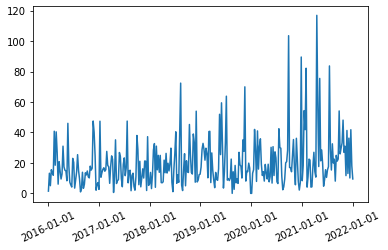

In [21]:
data = final_table[final_table['bobina_de_fabricacion']==bobinas[0]]

# Plot cpu
plt.figure(1)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
ax=plt.gca()
ax.xaxis_date()
#xfmt = md.DateFormatter('%H:%M:%S')
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
lines = plt.plot(data['fecha'], data['cantidad_de_acero_necesario_tm'])
#ax.legend(lines, [str(col) for col in list(data['cantidad_de_acero_necesario_tm'])])
#plot.show()

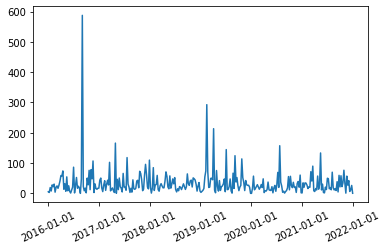

In [22]:
data = final_table[final_table['bobina_de_fabricacion']==bobinas[1]]

# Plot cpu
plt.figure(1)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
ax=plt.gca()
ax.xaxis_date()
#xfmt = md.DateFormatter('%H:%M:%S')
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
lines = plt.plot(data['fecha'], data['cantidad_de_acero_necesario_tm'])
#ax.legend(lines, [str(col) for col in list(data['cantidad_de_acero_necesario_tm'])])
#plot.show()

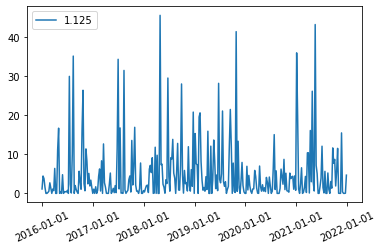

In [23]:
data = final_table[final_table['bobina_de_fabricacion']==bobinas[2]]

# Plot cpu
plt.figure(1)
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
ax=plt.gca()
ax.xaxis_date()
#xfmt = md.DateFormatter('%H:%M:%S')
xfmt = md.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
lines = plt.plot(data['fecha'], data['cantidad_de_acero_necesario_tm'])
ax.legend(lines, [str(col) for col in list(data['cantidad_de_acero_necesario_tm'])])
#plot.show()

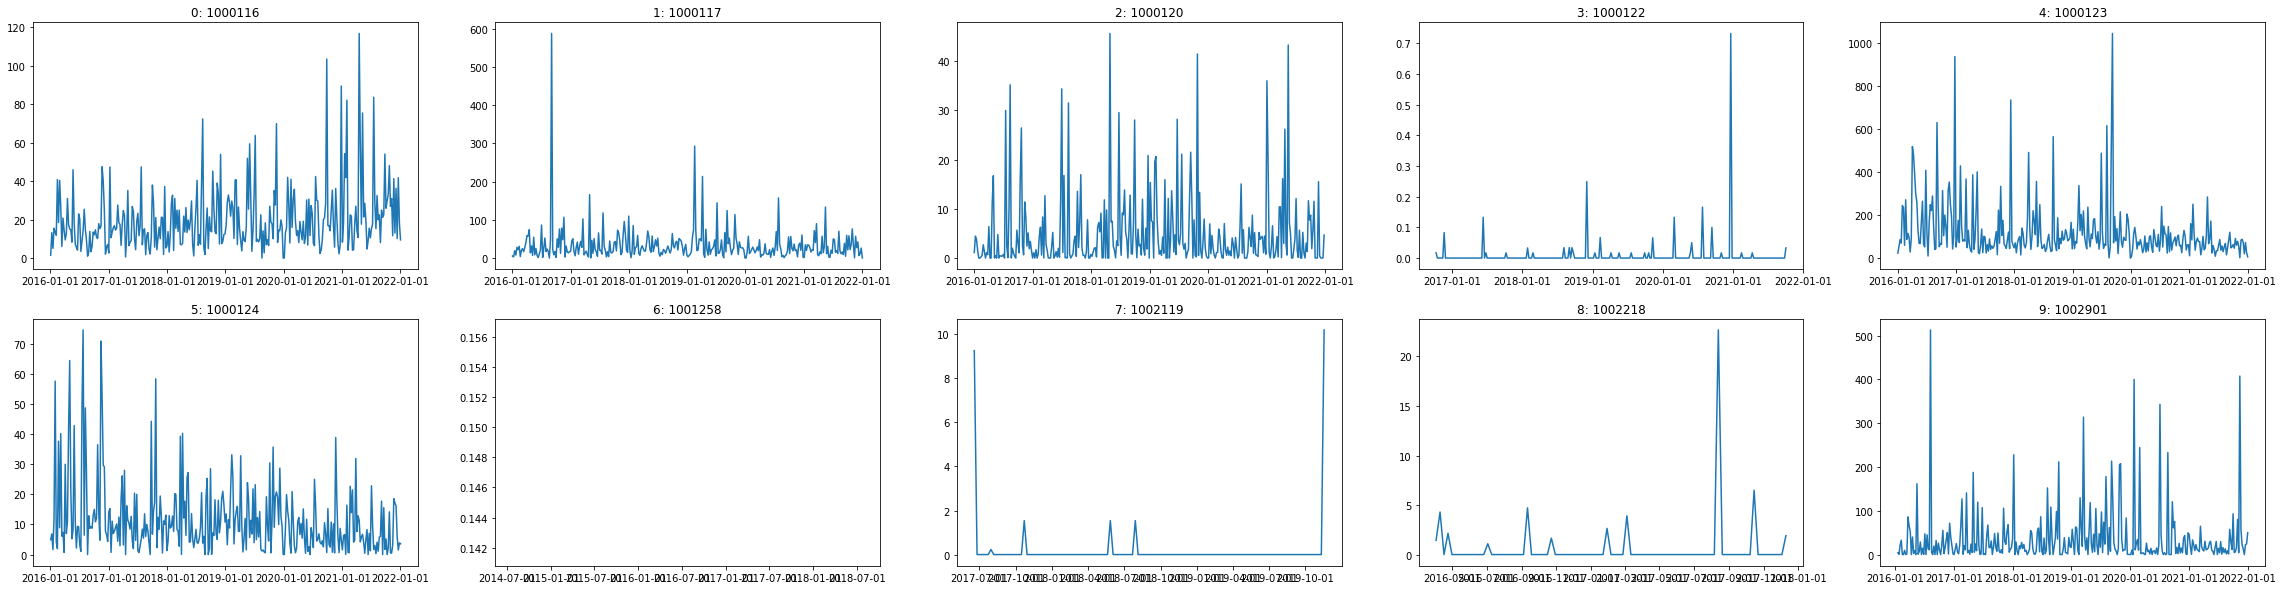

In [24]:
#Checking each variable's distribution

columns = bobinas
fig, axes = plt.subplots(2, 5, figsize=(40, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 10:
        ax.set_visible(False)
        continue  
    #ax=plt.gca()
    ax.xaxis_date()
    xfmt = md.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    data = final_table[final_table['bobina_de_fabricacion']==columns[i]]
    
    lines = ax.plot(data['fecha'], data['cantidad_de_acero_necesario_tm'])
    #ax.legend(lines, [str(col) for col in list(data['cantidad_de_acero_necesario_tm'])])
    ax.set_title("{}: {}".format(i, columns[i]))
    #ax.show()

> As we can see they show the same information

### 3.2 Exploratory Data Analysis

In [56]:
raw_final.drop(columns=['cantidad','peso_consumido_de_fabricación_kg']).groupby('bobina_de_fabricacion')['cantidad_de_acero_necesario_tm'].describe(include = 'all').round(2)

,count,mean,std,min,25%,50%,75%,max
bobina_de_fabricacion,,,,,,,,
1000116,5404.0,1.16,1.93,-0.75,0.30,0.67,1.26,42.23
1000117,4243.0,2.46,9.37,-5.39,0.14,0.62,1.99,352.98
1000120,1150.0,1.34,3.05,-0.14,0.09,0.35,1.13,34.85
1000122,38.0,0.06,0.09,0.02,0.02,0.02,0.08,0.52
1000123,15613.0,2.42,16.12,-18.67,0.06,0.19,0.97,719.63
1000124,2500.0,1.45,2.50,-2.82,0.23,0.71,1.76,44.10
1001258,1.0,0.15,NaN,0.15,0.15,0.15,0.15,0.15
1002119,6.0,4.05,4.43,0.23,1.54,1.54,7.33,10.20
1002218,12.0,4.42,5.89,1.09,1.85,2.39,4.36,22.68


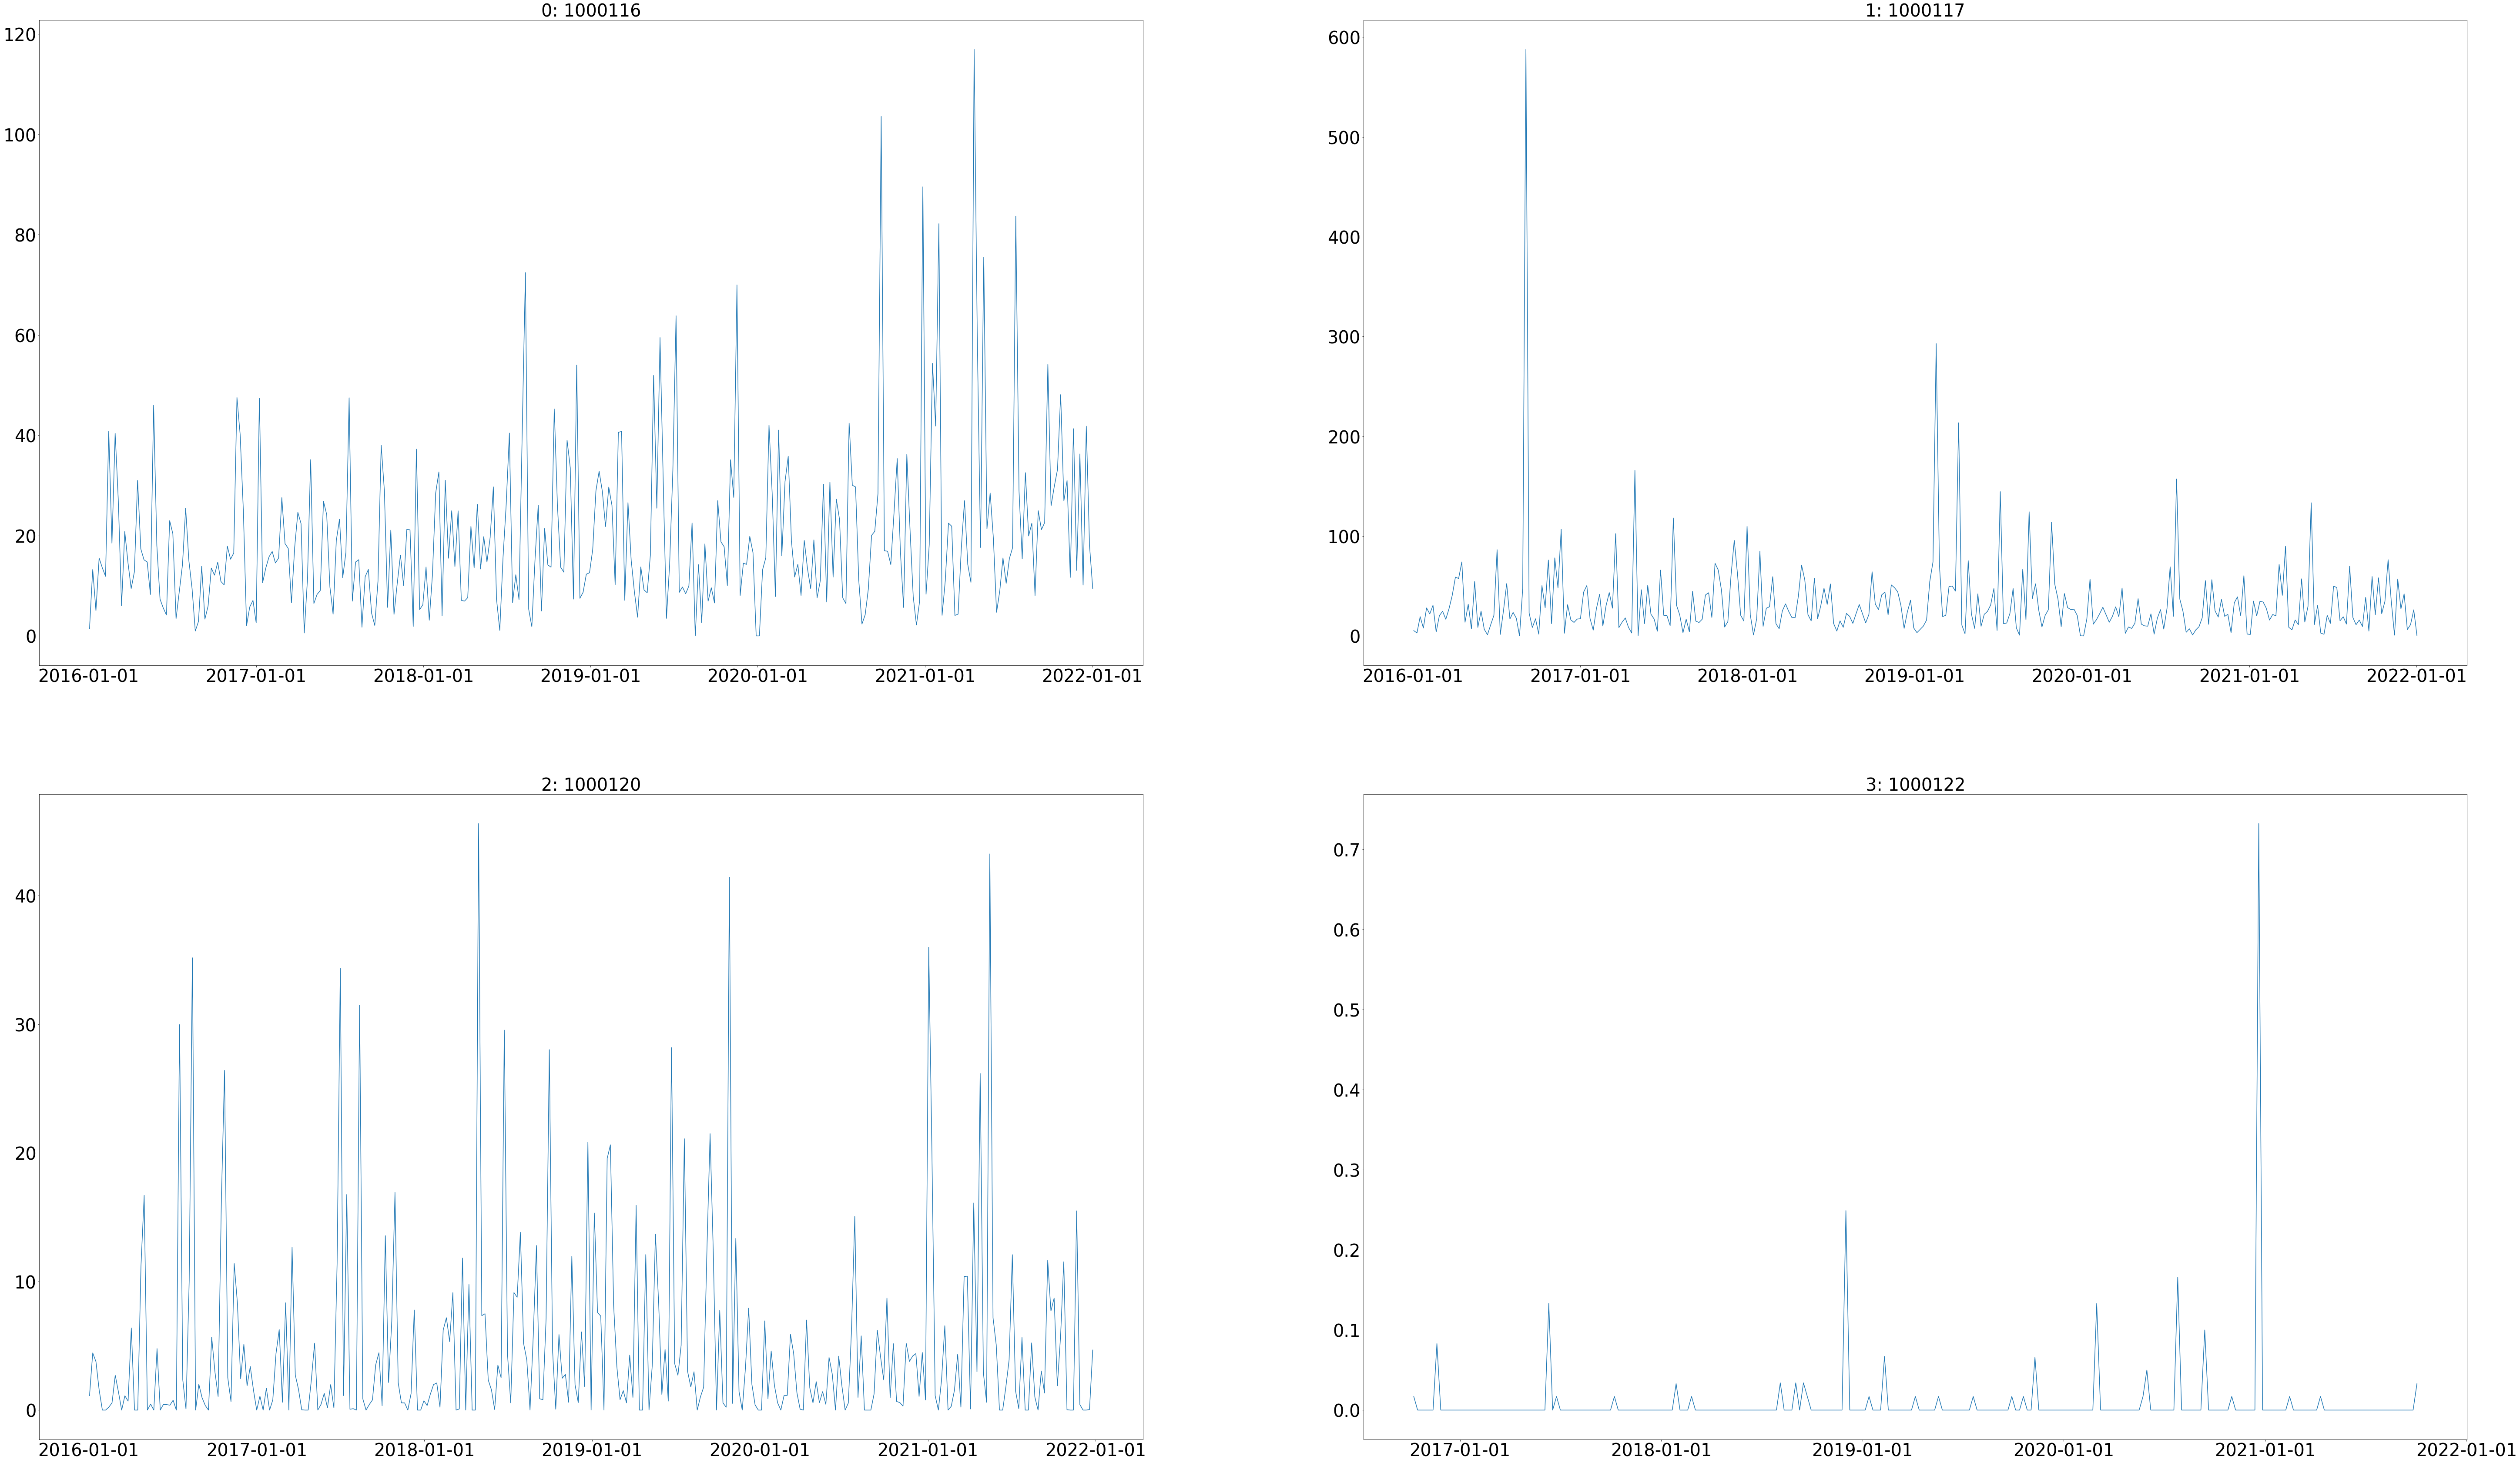

In [62]:
from IPython.core.interactiveshell import no_op
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

bobinas = final_table['bobina_de_fabricacion'].unique()


#Checking each variable's distribution

import numpy as np

columns = bobinas
fig, axes = plt.subplots(2, 2, figsize=(100, 60))
for i, ax in enumerate(axes.ravel()):
    if i > 25:
        ax.set_visible(False)
        continue  
    #ax=plt.gca()
    ax.xaxis_date()
    xfmt = md.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    data = final_table[final_table['bobina_de_fabricacion']==columns[i]]
    
    lines = ax.plot(data['ds'], data['y'])
    #ax.legend(lines, [str(col) for col in list(data['cantidad_de_acero_necesario_tm'])])
    ax.set_title("{}: {}".format(i, columns[i]),fontsize=40)
    ax.tick_params(labelsize=40)
    #ax.show()

### 3.3 Creating CSV files for each raw material




In [25]:
#Renaming columns using Prophet standards

final_table.rename(columns = {'fecha':'ds', 'cantidad_de_acero_necesario_tm':'y'}, inplace = True)

In [26]:
#For loop to create a csv for each raw material that we will try to predict. Sending to different folders depending on the amount of data points per each bobina

for bobina in bobinas:
    bobina_table = final_table[final_table["bobina_de_fabricacion"] == bobina]
    df_temp = pd.DataFrame({'ds': bobina_table['ds'], 'y': bobina_table['y']})
    if ((bobina_table['y'] != 0).sum()) > 100:
      df_temp.to_csv('/content/drive/MyDrive/Capstone/Notebooks and Data/Final_datasets/Final_csv/{}.csv'.format(bobina))
    if ((bobina_table['y'] != 0).sum()) < 100 and (bobina_table['ds'].iloc[-1]) > dt.datetime.strptime("11/2021","%M/%Y") and (round(bobina_table['y'].sum())) > 1200 :
      df_temp.to_csv('/content/drive/MyDrive/Capstone/Notebooks and Data/Final_datasets/CSV Bobinas <100/{}.csv'.format(bobina))
    else:
      pass

In [27]:
bobina_table

,bobina_de_fabricacion,ds,y
5874,1015101,2016-01-03,0.296
5875,1015101,2016-01-10,0.582
5876,1015101,2016-01-17,0.343
5877,1015101,2016-01-24,0.572
5878,1015101,2016-01-31,4.379
...,...,...,...
6183,1015101,2021-12-05,0.877
6184,1015101,2021-12-12,0.426
6185,1015101,2021-12-19,0.043
6186,1015101,2021-12-26,0.117


## **4. Time Series Analysis**

Parameters that we want to know about the time series 
* First date 
* Last date 
* Purchase Frequency
* Total Amount Ordered


In [28]:
for bobina in bobinas:
    bobina_table = final_table[final_table["bobina_de_fabricacion"] == bobina]
    print(
        f"Bobina: {bobina} First Purchase Date: {bobina_table['ds'].iloc[0]} Last Purchase Date: {bobina_table['ds'].iloc[-1]} Purchase Frequency: {(bobina_table['y'] != 0).sum()} Total Ordered: {round(bobina_table['y'].sum())}"
    )

Bobina: 1000116 First Purchase Date: 2016-01-03 00:00:00 Last Purchase Date: 2022-01-02 00:00:00 Purchase Frequency: 311 Total Ordered: 6260
Bobina: 1000117 First Purchase Date: 2016-01-03 00:00:00 Last Purchase Date: 2022-01-02 00:00:00 Purchase Frequency: 312 Total Ordered: 10421
Bobina: 1000120 First Purchase Date: 2016-01-03 00:00:00 Last Purchase Date: 2021-12-26 00:00:00 Purchase Frequency: 257 Total Ordered: 1542
Bobina: 1000122 First Purchase Date: 2016-10-09 00:00:00 Last Purchase Date: 2021-10-03 00:00:00 Purchase Frequency: 30 Total Ordered: 2
Bobina: 1000123 First Purchase Date: 2016-01-03 00:00:00 Last Purchase Date: 2022-01-02 00:00:00 Purchase Frequency: 314 Total Ordered: 37739
Bobina: 1000124 First Purchase Date: 2016-01-03 00:00:00 Last Purchase Date: 2022-01-02 00:00:00 Purchase Frequency: 304 Total Ordered: 3626
Bobina: 1001258 First Purchase Date: 2016-07-24 00:00:00 Last Purchase Date: 2016-07-24 00:00:00 Purchase Frequency: 1 Total Ordered: 0
Bobina: 1002119 Firs

In [29]:
df_timeseries = []
bobinas2 = []

for bobina in bobinas:
    bobina_table2 = final_table[final_table["bobina_de_fabricacion"] == bobina]
    if ((bobina_table2['y'] != 0).sum()) > 50:
      df_timeseries.append(bobina_table2['y'])
      bobinas2.append(bobina)


In [52]:
def time_series_info(df):
  time_series_info= (df.groupby(['bobina_de_fabricacion'], as_index=False)
        .agg(**{'First Purchase':('ds', 'first'),
                'Last Purchase': ('ds', 'last'),
                 'Total Ordered' : ('y','sum'),
                  'Purchase Frequency':('y','count')}))
  return time_series_info

In [53]:
weekly_time_series_info = time_series_info(final_table)
weekly_time_series_info.head()

,bobina_de_fabricacion,First Purchase,Last Purchase,Total Ordered,Purchase Frequency
0,1000116,2016-01-03,2022-01-02,6260.222,314
1,1000117,2016-01-03,2022-01-02,10421.409,314
2,1000120,2016-01-03,2021-12-26,1542.013,313
3,1000122,2016-10-09,2021-10-03,2.202,261
4,1000123,2016-01-03,2022-01-02,37739.257,314


Bobina # 1000116


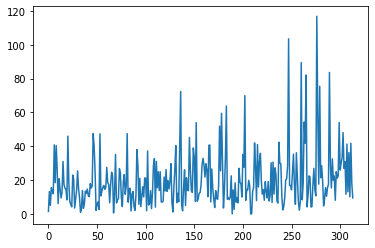

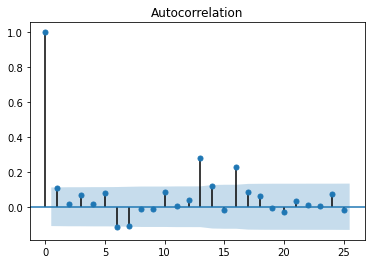

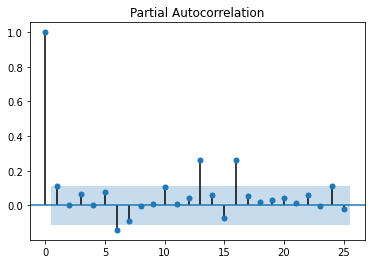

Bobina # 1000117


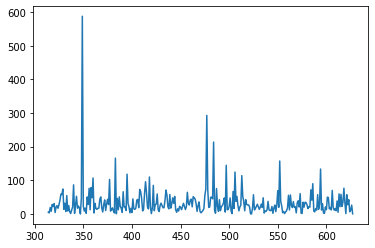

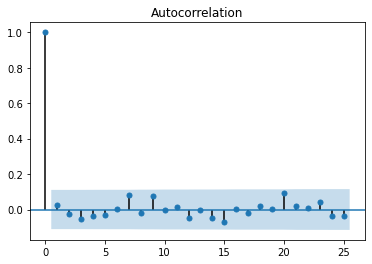

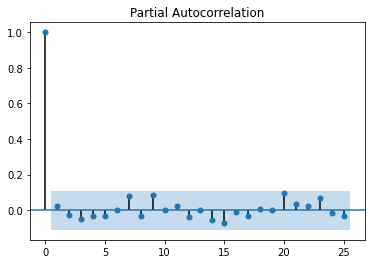

Bobina # 1000120


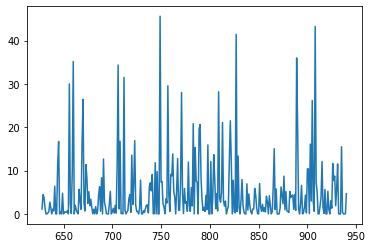

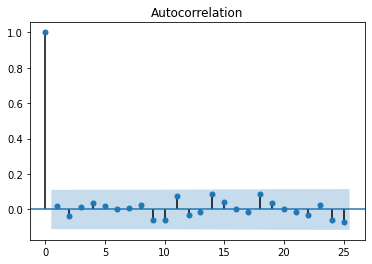

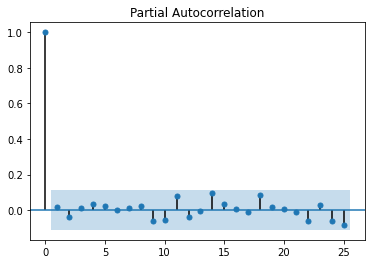

Bobina # 1000123


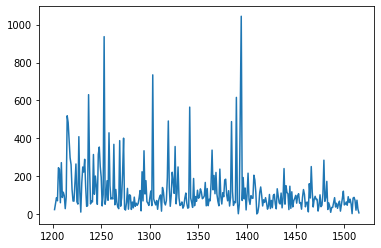

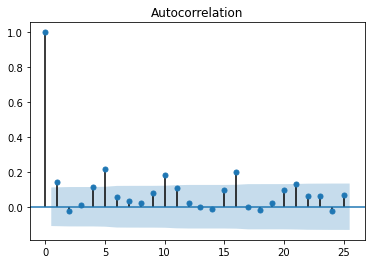

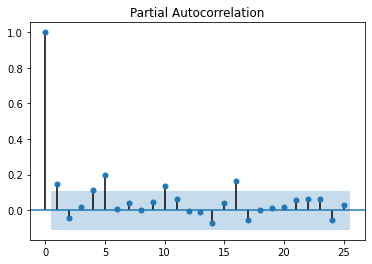

Bobina # 1000124


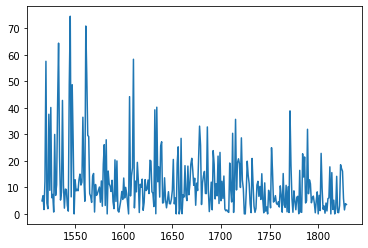

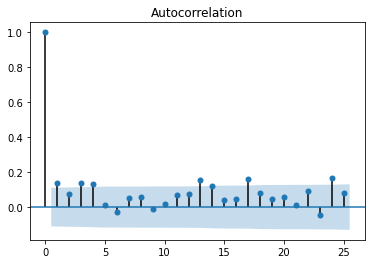

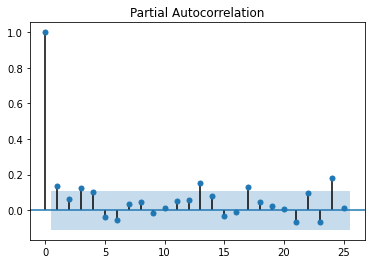

Bobina # 1002901


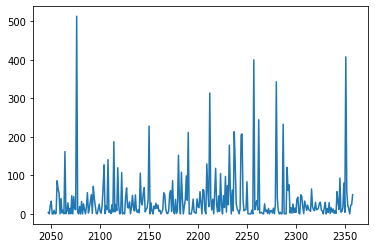

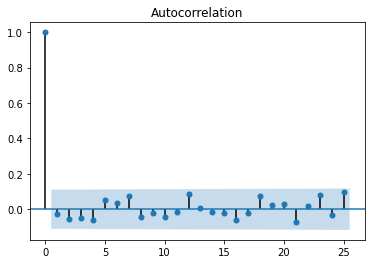

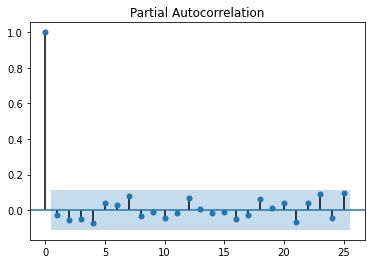

Bobina # 1002902


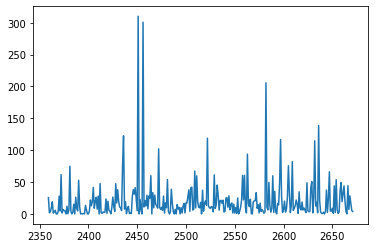

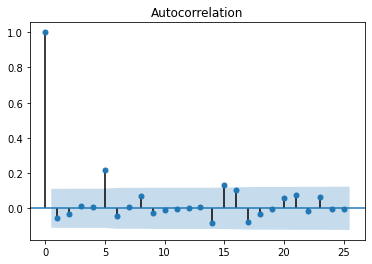

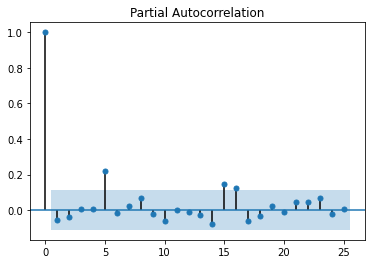

Bobina # 1003430


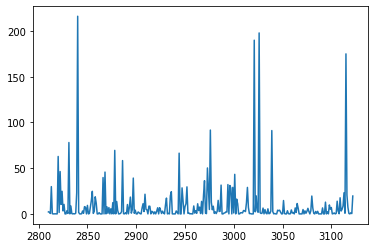

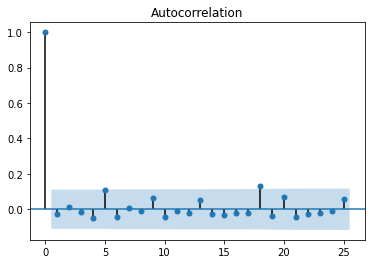

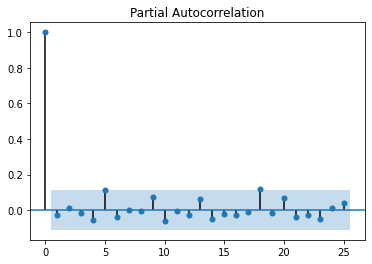

Bobina # 1004230


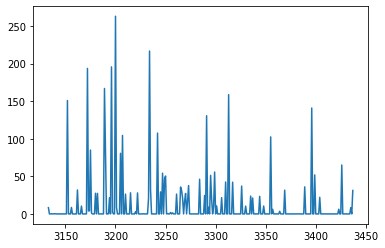

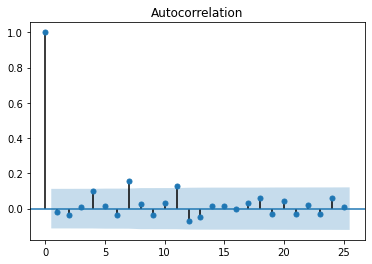

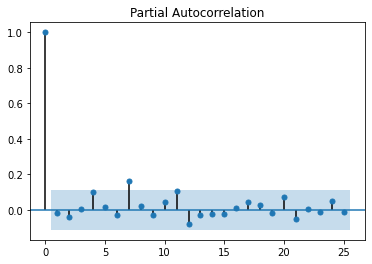

Bobina # 1004431


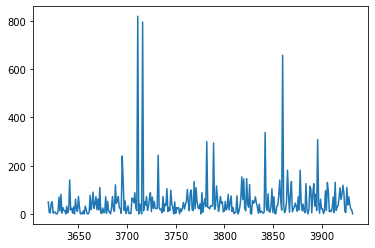

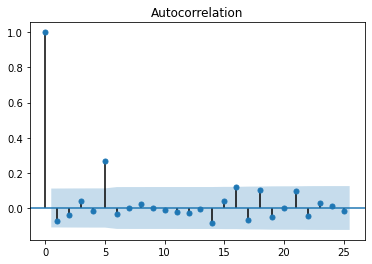

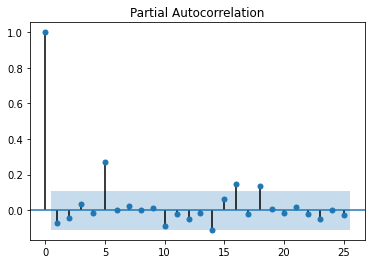

Bobina # 1004670


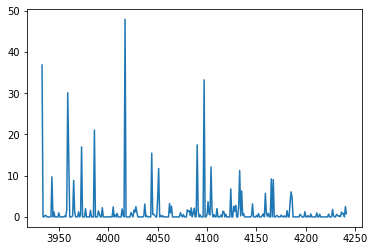

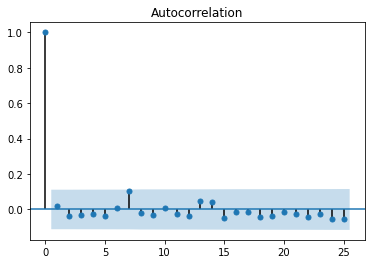

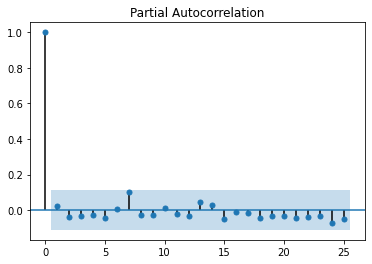

Bobina # 1006440


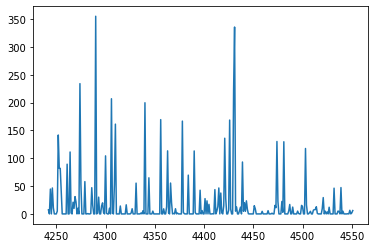

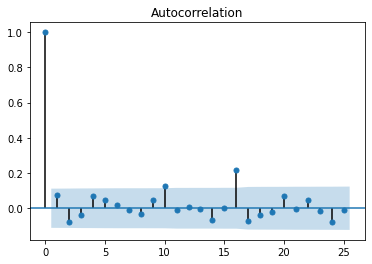

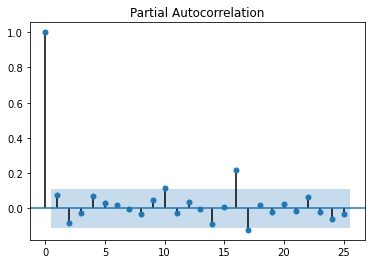

Bobina # 1007700


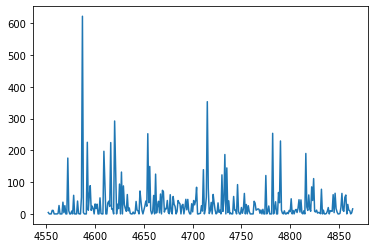

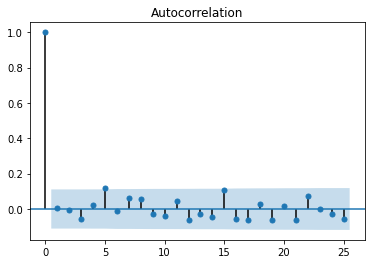

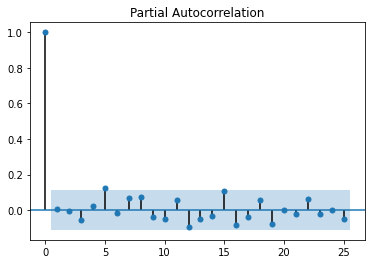

Bobina # 1011384


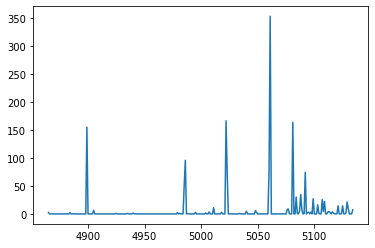

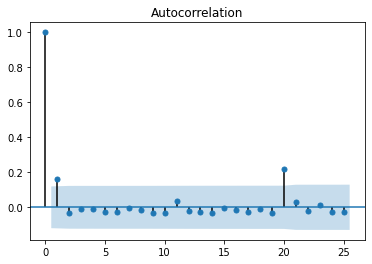

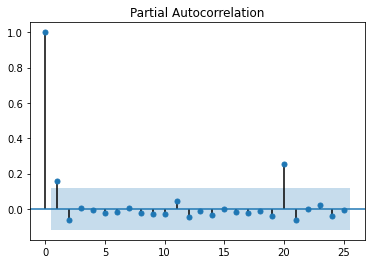

Bobina # 1014989


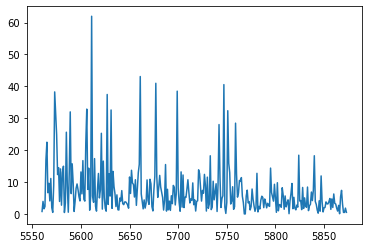

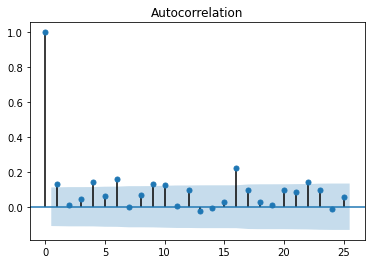

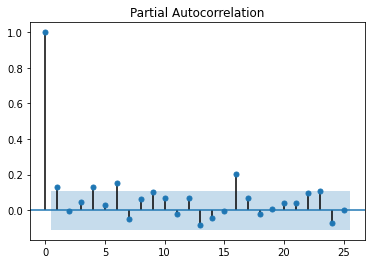

Bobina # 1015101


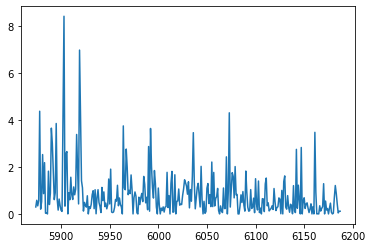

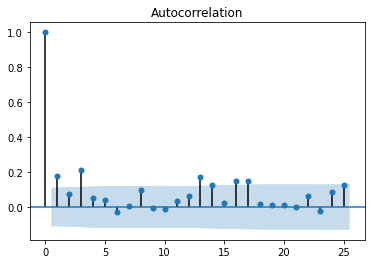

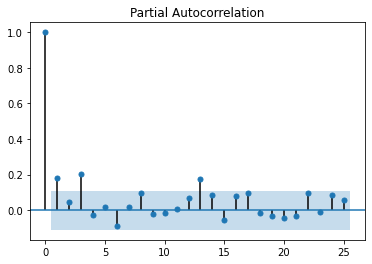

In [30]:
series = df_timeseries
Normality=[0] * 16
Correlation=[0] * 16
Independent=[0] * 16
Stationary=[0] * 16

Normality_firstTransformation=[0] * 16
Correlation_firstTransformation=[0] * 16
Independent_firstTransformation=[0] * 16
Stationary_firstTransformation=[0] * 16

Normality_secondTransformation=[0] * 16
Correlation_secondTransformation=[0] * 16
Independent_secondTransformation=[0] * 16
Stationary_secondTransformation=[0] * 16

#y2 = series1

z = [0] * 16
zz = [0] * 16

for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    y = series[i]

    num_lags=25

    plt.plot(y)
    plt.show()
    plot_acf(y,lags=num_lags)
    plt.show()
    plot_pacf(y,lags=num_lags)
    plt.show()

In [31]:
# Basic statistics

for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    y = series[i]
    mean = np.mean(y)
    std = np.std(y)
    kurtosis2 = kurtosis(y)
    skewness2 = skew(y)
    print("Mean",mean,"Standard deviation",std,"Skewness", skewness2, "Kurtosis",kurtosis2)
    print()

Bobina # 1000116
Mean 19.937012738853504 Standard deviation 16.538085148204566 Skewness 2.2141726216521125 Kurtosis 7.246563455890948

Bobina # 1000117
Mean 33.18920063694267 Standard deviation 45.020989090099164 Skewness 7.1062886212210685 Kurtosis 75.55974127577805

Bobina # 1000120
Mean 4.92655910543131 Standard deviation 7.653324680283858 Skewness 2.6960711399826596 Kurtosis 8.234034381865595

Bobina # 1000123
Mean 120.18871656050955 Standard deviation 131.5389156696975 Skewness 3.322673668708642 Kurtosis 14.698215392941364

Bobina # 1000124
Mean 11.547885350318472 Standard deviation 12.073613020509686 Skewness 2.2078356481920403 Kurtosis 6.208656787714981

Bobina # 1002901
Mean 35.42333974358974 Standard deviation 63.83773214876445 Skewness 3.9143294744221175 Kurtosis 19.07569860755453

Bobina # 1002902
Mean 20.37223003194888 Standard deviation 33.62490160634737 Skewness 5.057394229837108 Kurtosis 34.9057421125294

Bobina # 1003430
Mean 9.438182108626197 Standard deviation 25.1864

#### 4.1 Checking Stationarity
Run ADF test:
- if p-value < 0.05, the process is stationary.
- if p-value > 0.05, the process is NOT stationary.

In [32]:
for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    y = series[i]

    adf_test = sm.tsa.stattools.adfuller(y) 
    print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
    print()

    Stationary[i] = adf_test[1]

Bobina # 1000116
adf_test (-2.221262768112173, 0.19861899915197623, 15, 298, {'1%': -3.4524859843440754, '5%': -2.871288184343229, '10%': -2.571964047565425}, 2491.105597479922)

Bobina # 1000117
adf_test (-17.227748282039137, 6.2209753243717174e-30, 0, 313, {'1%': -3.4514162625887037, '5%': -2.8708187088091406, '10%': -2.5717136883095675}, 3121.2136067913016)

Bobina # 1000120
adf_test (-17.318542910671376, 5.499362623791547e-30, 0, 312, {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}, 2060.623546044002)

Bobina # 1000123
adf_test (-5.609717605460578, 1.2112842716560386e-06, 4, 309, {'1%': -3.45169128009473, '5%': -2.8709394227049154, '10%': -2.5717780602423517}, 3718.4596717750856)

Bobina # 1000124
adf_test (-6.615315059171013, 6.228568214822722e-09, 3, 310, {'1%': -3.451621854687657, '5%': -2.870908950689806, '10%': -2.571761810613944}, 2293.321515630024)

Bobina # 1002901
adf_test (-18.032918172752407, 2.6727478072163485e-30, 0, 311, {'1%': -3.451

#### 4.2 Checking Normality

Bobina # 1000116


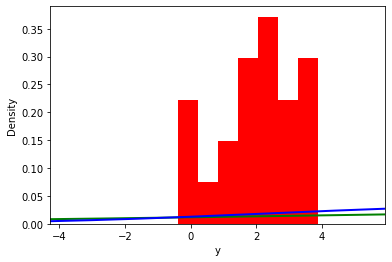

Bobina # 1000117


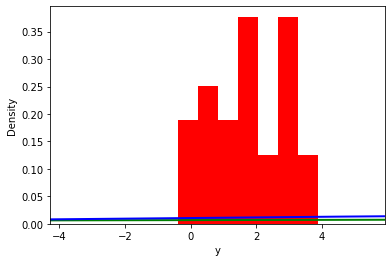

Bobina # 1000120


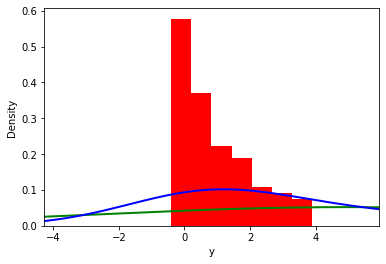

Bobina # 1000123


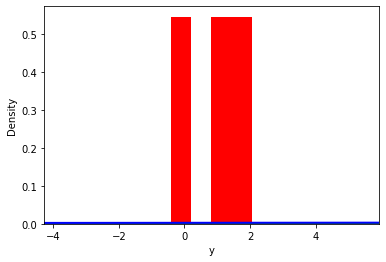

Bobina # 1000124


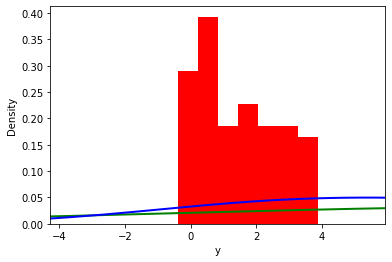

Bobina # 1002901


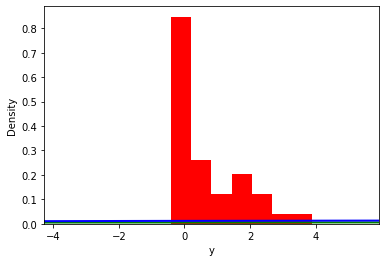

Bobina # 1002902


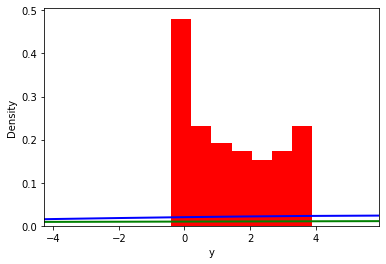

Bobina # 1003430


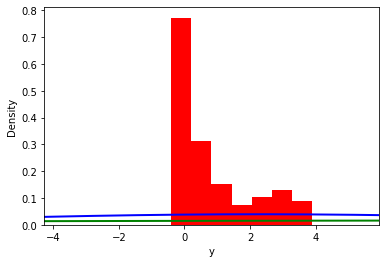

Bobina # 1004230


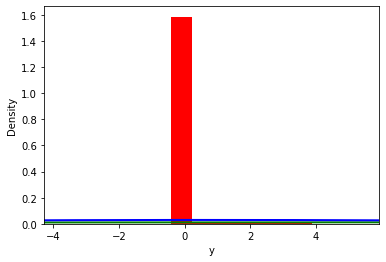

Bobina # 1004431


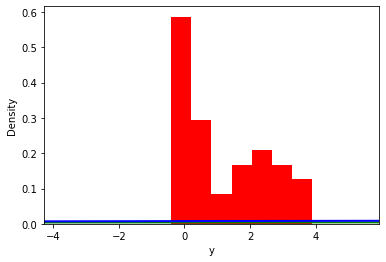

Bobina # 1004670


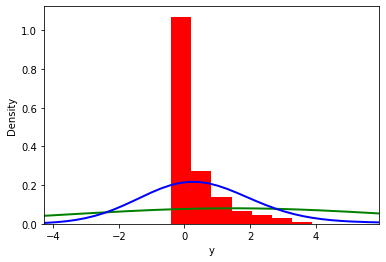

Bobina # 1006440


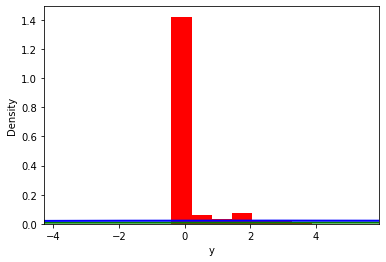

Bobina # 1007700


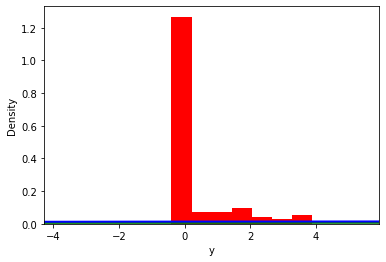

Bobina # 1011384


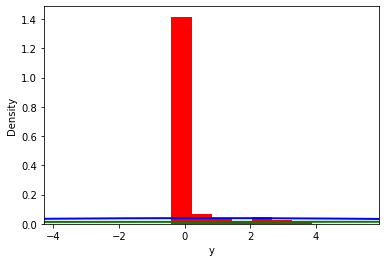

Bobina # 1014989


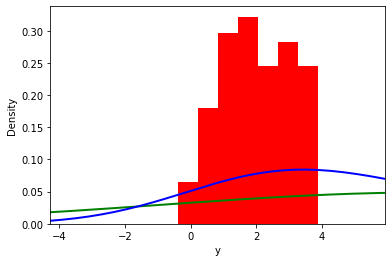

Bobina # 1015101


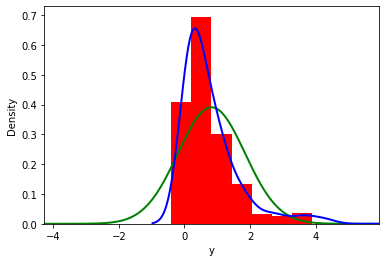

In [33]:

for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    y = series[i]
    mu = np.mean(y)
    sigma = np.std(y)
    x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(y, hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)

    plt.show()

**Shapiro Test**: Formal test for normality
*   If p-value < 0.05, the series is NOT normal
*   If p-value > 0.05, the series is normal



In [34]:
for i in range (len(series)):
    print(f'Normality Tests Bobina # {bobinas2[i]}')
    y = series[i]
    saphiro = shapiro(y)

    print("Shapiro",saphiro) # first output "The test statistic", second output "p-value"

    Normality[i] = saphiro[1]

Normality Tests Bobina # 1000116
Shapiro (0.8140599727630615, 1.0627773674397685e-18)
Normality Tests Bobina # 1000117
Shapiro (0.5083422660827637, 1.254387182099194e-28)
Normality Tests Bobina # 1000120
Shapiro (0.6575657725334167, 1.2333684453101738e-24)
Normality Tests Bobina # 1000123
Shapiro (0.6527045965194702, 8.055284021607805e-25)
Normality Tests Bobina # 1000124
Shapiro (0.783635675907135, 4.2378317475121317e-20)
Normality Tests Bobina # 1002901
Shapiro (0.5493690371513367, 1.4417365193007074e-27)
Normality Tests Bobina # 1002902
Shapiro (0.5336458683013916, 5.439372164088788e-28)
Normality Tests Bobina # 1003430
Shapiro (0.3813782334327698, 2.929413971754828e-31)
Normality Tests Bobina # 1004230
Shapiro (0.38989388942718506, 9.446237808575118e-31)
Normality Tests Bobina # 1004431
Shapiro (0.4743984341621399, 2.1585974784601814e-29)
Normality Tests Bobina # 1004670
Shapiro (0.3118543028831482, 2.2978566508609953e-32)
Normality Tests Bobina # 1006440
Shapiro (0.429633796215057

#### 4.3 Checking Correlation

- **Box Test**: Formal test for correlation
    - If p-value < 0.05, there IS correlation (ACF & PACF are NOT 0)
    - If p-value > 0.05, there is NO correlation (ACF & PACF = 0)

In [35]:
import statsmodels.api as sm

for i in range (len(series)):
    print(f'Correlation Test Bobina # {bobinas2[i]}')
    y = series[i]
    box_test = sm.stats.acorr_ljungbox(y, lags=[20])

    print("LjungBox",box_test) # first output "The test statistic", second output "p-value"

    Correlation[i] = box_test[1]

Correlation Test Bobina # 1000116
LjungBox (array([70.14688216]), array([1.72349187e-07]))
Correlation Test Bobina # 1000117
LjungBox (array([12.6520138]), array([0.8918105]))
Correlation Test Bobina # 1000120
LjungBox (array([12.12009044]), array([0.91188052]))
Correlation Test Bobina # 1000123
LjungBox (array([63.85188259]), array([1.77604142e-06]))
Correlation Test Bobina # 1000124
LjungBox (array([51.90316464]), array([0.00011762]))
Correlation Test Bobina # 1002901
LjungBox (array([13.71981605]), array([0.84441301]))
Correlation Test Bobina # 1002902
LjungBox (array([33.8091883]), array([0.0274448]))
Correlation Test Bobina # 1003430
LjungBox (array([17.39456989]), array([0.62722392]))
Correlation Test Bobina # 1004230
LjungBox (array([22.784975]), array([0.29947568]))
Correlation Test Bobina # 1004431
LjungBox (array([40.05222885]), array([0.00492001]))
Correlation Test Bobina # 1004670
LjungBox (array([9.60565015]), array([0.97477206]))
Correlation Test Bobina # 1006440
LjungBox

### 4.4. Plotting the squares
*only use this when it is WN but not GWN*

Bobina # 1000116


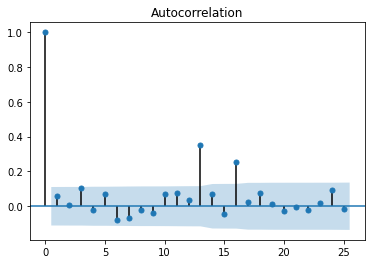

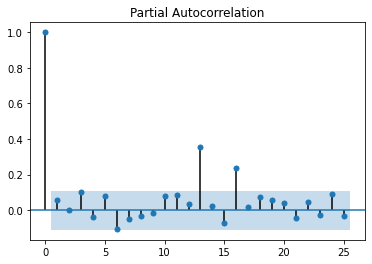

Bobina # 1000117


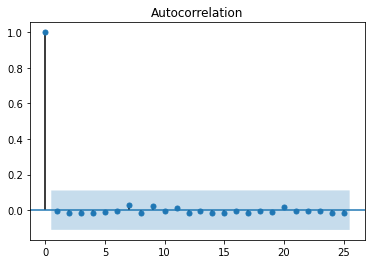

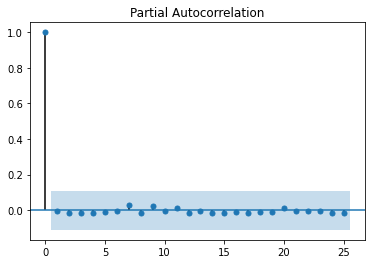

Bobina # 1000120


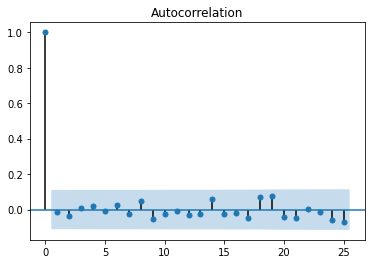

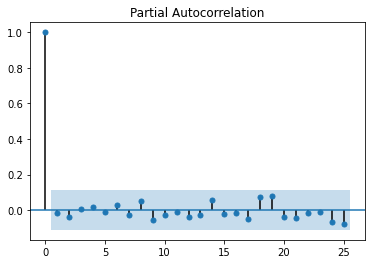

Bobina # 1000123


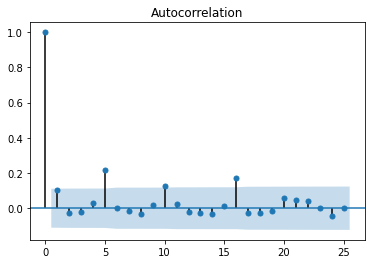

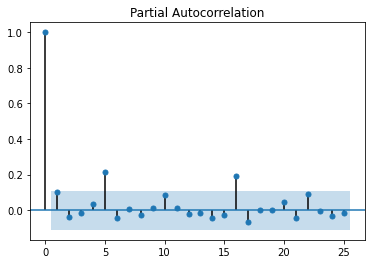

Bobina # 1000124


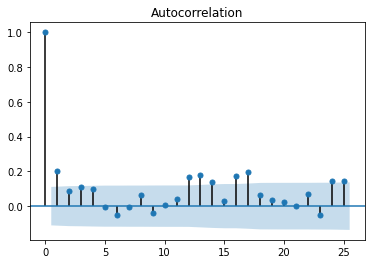

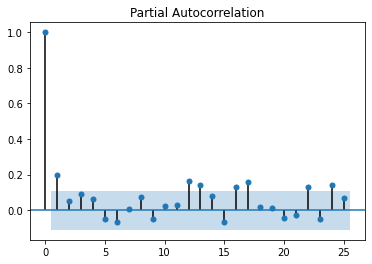

Bobina # 1002901


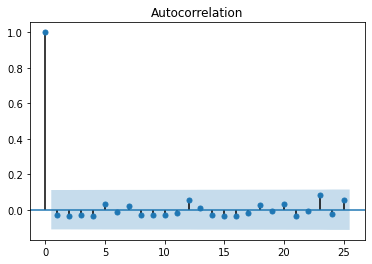

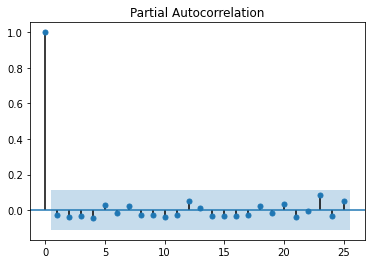

Bobina # 1002902


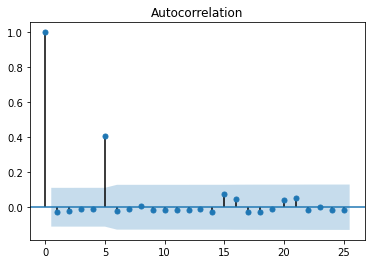

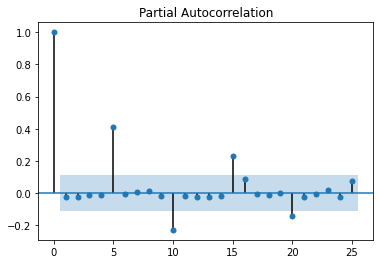

Bobina # 1003430


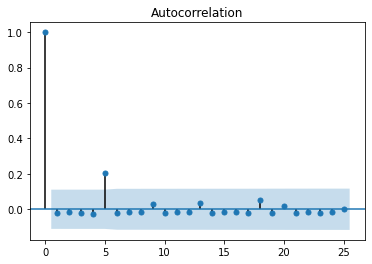

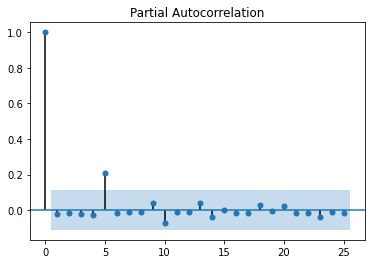

Bobina # 1004230


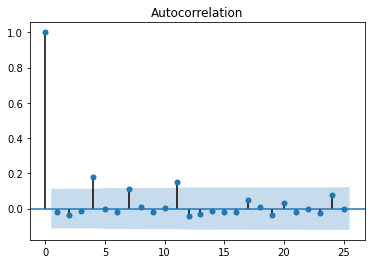

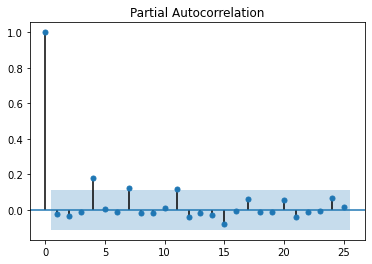

Bobina # 1004431


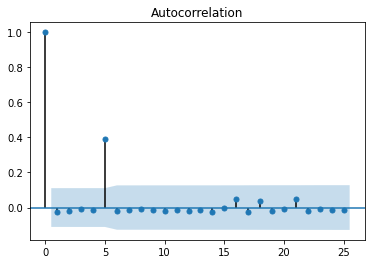

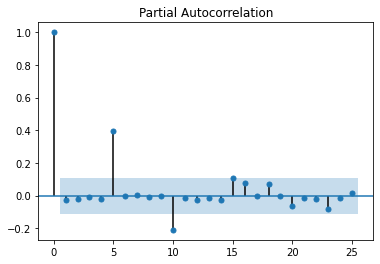

Bobina # 1004670


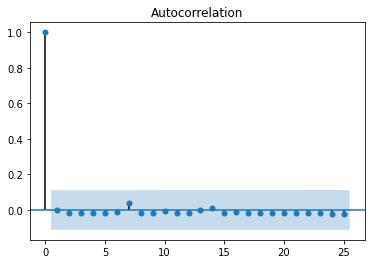

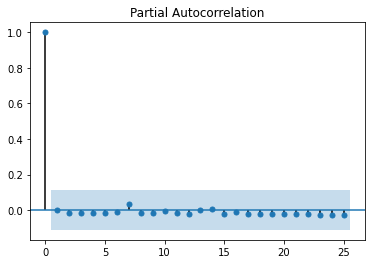

Bobina # 1006440


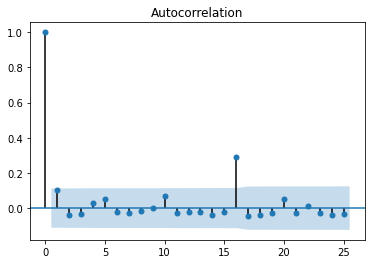

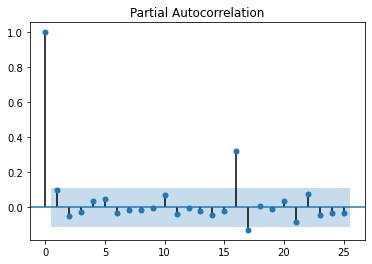

Bobina # 1007700


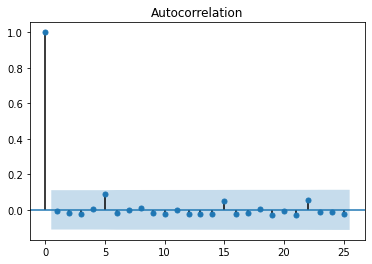

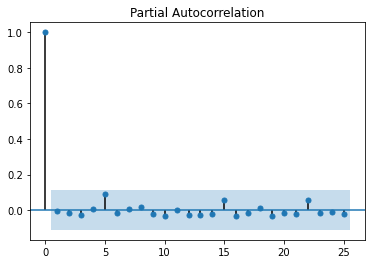

Bobina # 1011384


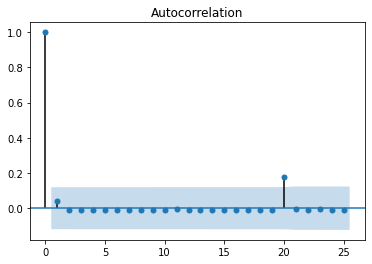

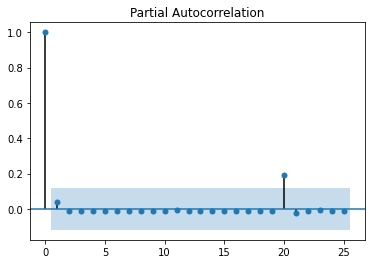

Bobina # 1014989


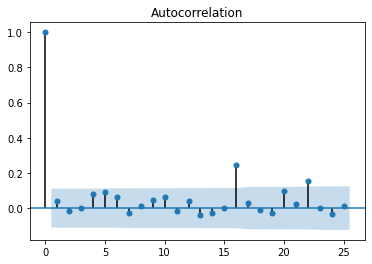

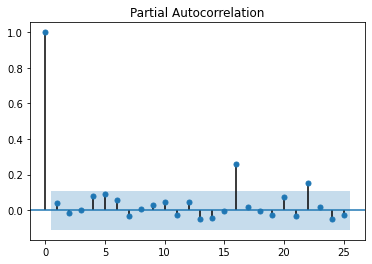

Bobina # 1015101


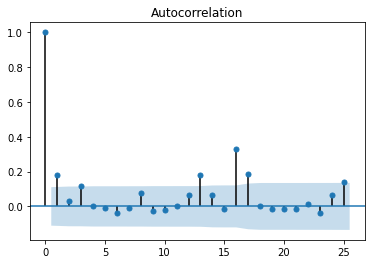

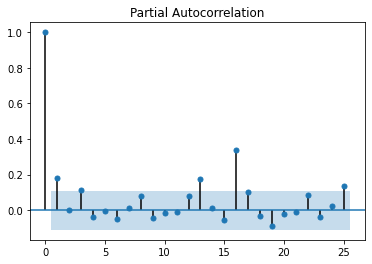

In [36]:
# plt.plot(y**2)
# plt.show()
for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    y = series[i]
    plot_acf(y**2,lags=num_lags)
    plt.show()
    plot_pacf(y**2,lags=num_lags)
    plt.show()

**Box Test**: Formal test for independence
- If p-value < 0.05, the data is NOT independent (NO SWN)
- If p-value > 0.05, the data is independent (SWN)

In [37]:
for i in range (len(series)):
    print(f'Box Test Series Bobina # {bobinas2[i]}')
    y = series[i]
    box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
    print(box_test2)

    Independent[i] = box_test2[1]


Box Test Series Bobina # 1000116
(array([81.45391384]), array([2.22098069e-09]))
Box Test Series Bobina # 1000117
(array([1.25046775]), array([1.]))
Box Test Series Bobina # 1000120
(array([9.91719254]), array([0.96964873]))
Box Test Series Bobina # 1000123
(array([37.46402631]), array([0.01028906]))
Box Test Series Bobina # 1000124
(array([76.96589793]), array([1.27728482e-08]))
Box Test Series Bobina # 1002901
(array([5.78796852]), array([0.99915503]))
Box Test Series Bobina # 1002902
(array([58.36442942]), array([1.27166315e-05]))
Box Test Series Bobina # 1003430
(array([17.04098938]), array([0.65031046]))
Box Test Series Bobina # 1004230
(array([24.19056235]), array([0.23416711]))
Box Test Series Bobina # 1004431
(array([52.19733841]), array([0.00010655]))
Box Test Series Bobina # 1004670
(array([1.9559557]), array([0.99999991]))
Box Test Series Bobina # 1006440
(array([38.15845489]), array([0.00846898]))
Box Test Series Bobina # 1007700
(array([5.25645207]), array([0.99959187]))
B

### 4.5 Analyzing Original Data


In [38]:
for i in range (len(series)):
    print()
    print(f'Statistics Series Bobina # {bobinas2[i]}')
    print()
    if (Stationary[i] <  0.05):
        print("Stationary")
    else:
        print("Not Stationary, we need at least a transformation")

    if (Normality[i] <  0.05):
        print("Not Normal")
    else:
        print("Normal")

    if (Correlation[i] <  0.05):
        print("There is Correlation")
    else:
        print("There is no Correlation")
        if (Independent[i] <  0.05):
            print("There is no Independence")
        else:
            print("There is Independence")
        


Statistics Series Bobina # 1000116

Not Stationary, we need at least a transformation
Not Normal
There is Correlation

Statistics Series Bobina # 1000117

Stationary
Not Normal
There is no Correlation
There is Independence

Statistics Series Bobina # 1000120

Stationary
Not Normal
There is no Correlation
There is Independence

Statistics Series Bobina # 1000123

Stationary
Not Normal
There is Correlation

Statistics Series Bobina # 1000124

Stationary
Not Normal
There is Correlation

Statistics Series Bobina # 1002901

Stationary
Not Normal
There is no Correlation
There is Independence

Statistics Series Bobina # 1002902

Stationary
Not Normal
There is Correlation

Statistics Series Bobina # 1003430

Stationary
Not Normal
There is no Correlation
There is Independence

Statistics Series Bobina # 1004230

Stationary
Not Normal
There is no Correlation
There is Independence

Statistics Series Bobina # 1004431

Stationary
Not Normal
There is Correlation

Statistics Series Bobina # 1004670


### 4.6 Time Series Transformations

#### 4.6.1 First Difference

Plot Bobina # 1000116


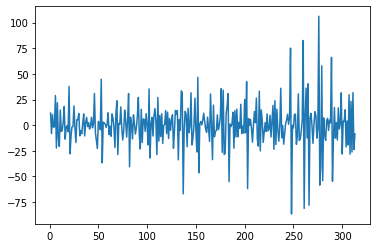

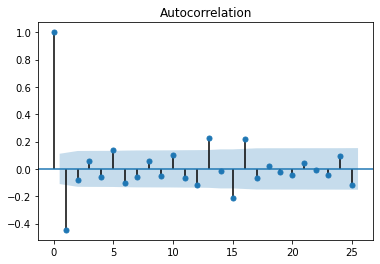

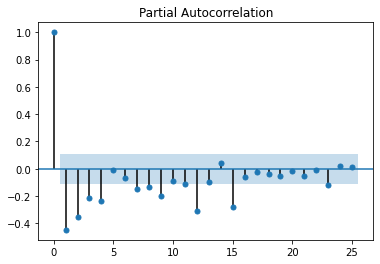

Plot Bobina # 1000117


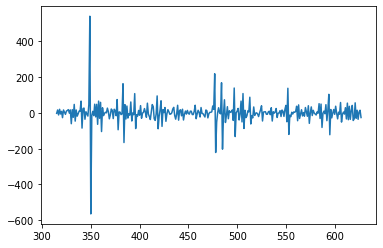

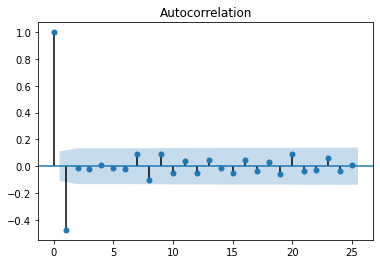

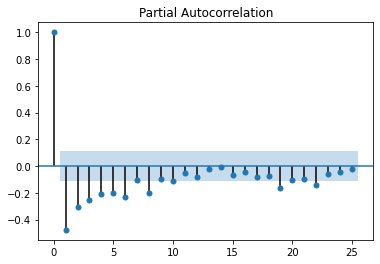

Plot Bobina # 1000120


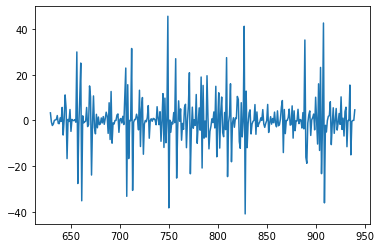

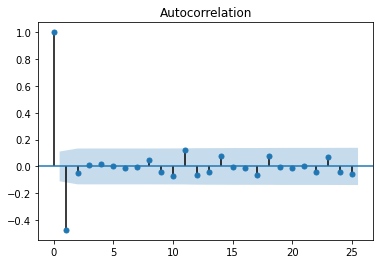

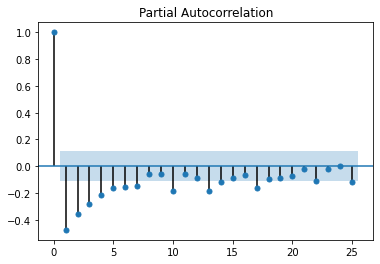

Plot Bobina # 1000123


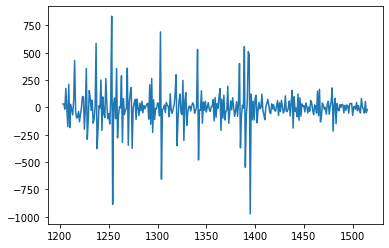

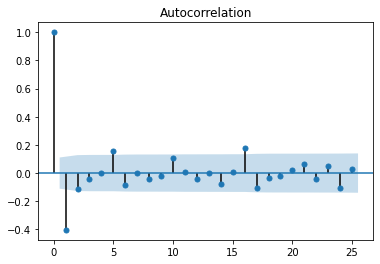

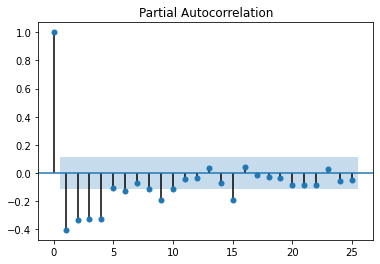

Plot Bobina # 1000124


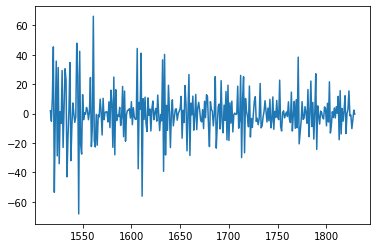

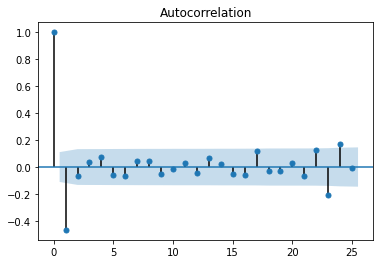

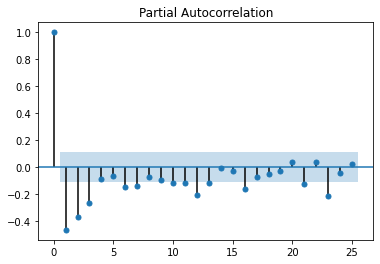

Plot Bobina # 1002901


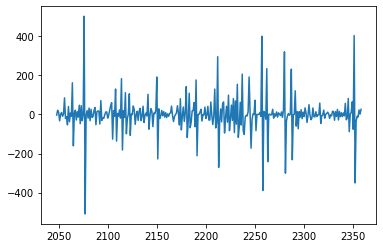

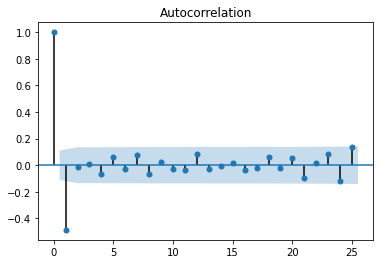

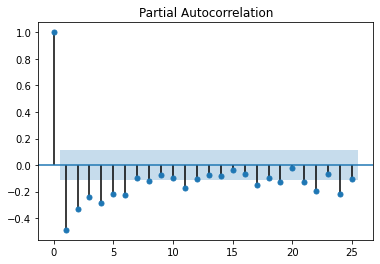

Plot Bobina # 1002902


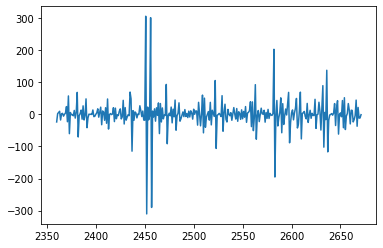

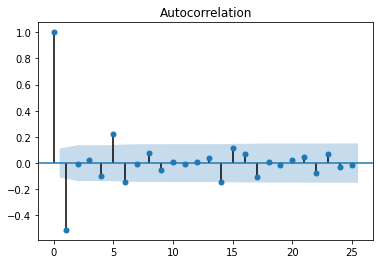

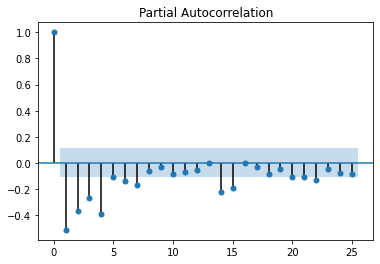

Plot Bobina # 1003430


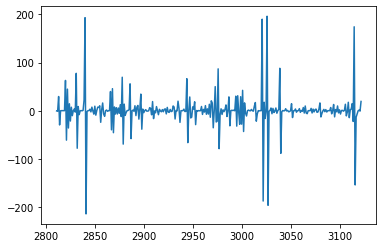

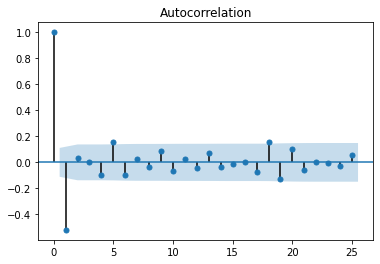

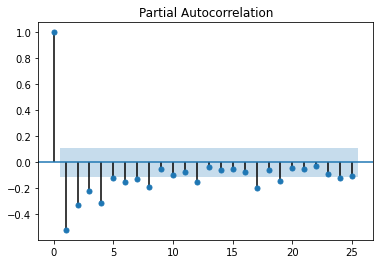

Plot Bobina # 1004230


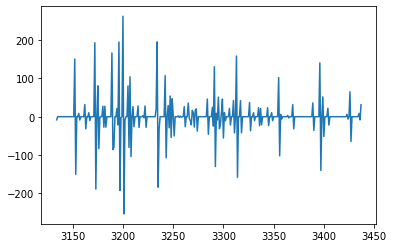

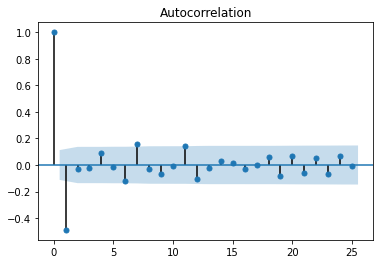

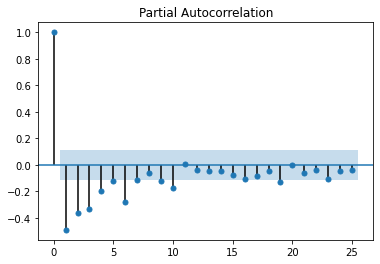

Plot Bobina # 1004431


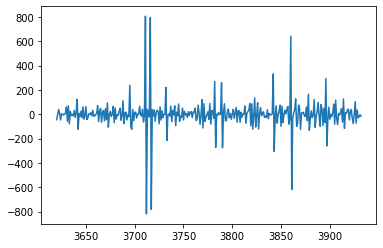

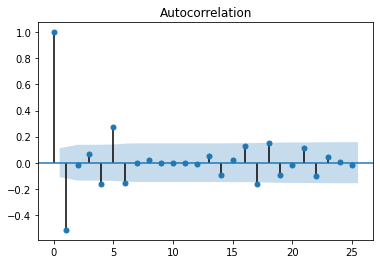

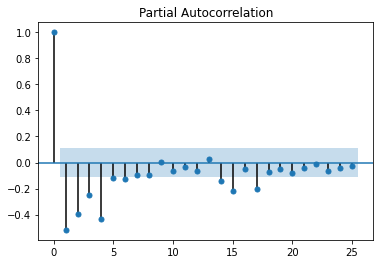

Plot Bobina # 1004670


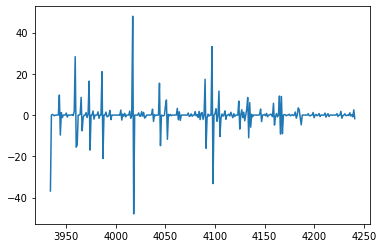

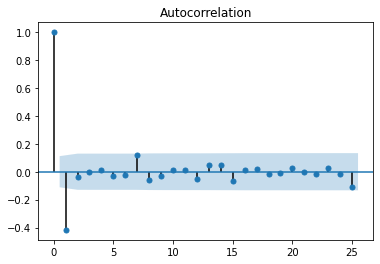

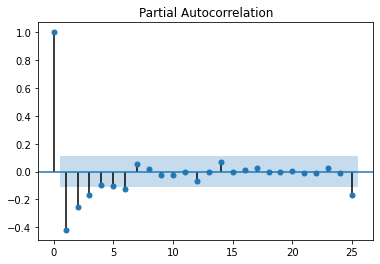

Plot Bobina # 1006440


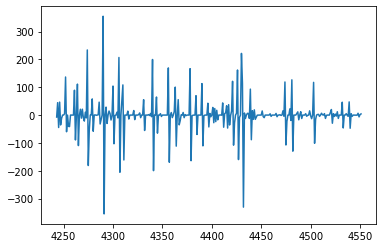

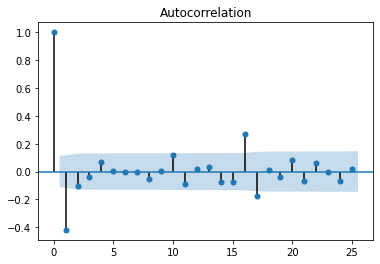

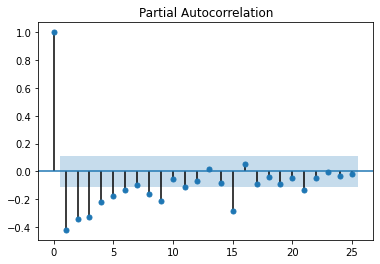

Plot Bobina # 1007700


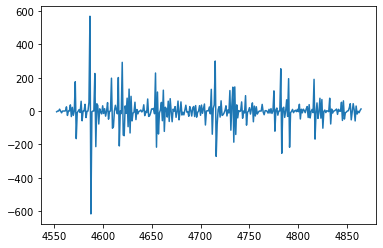

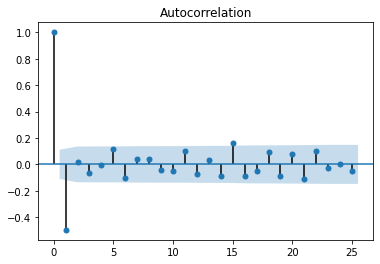

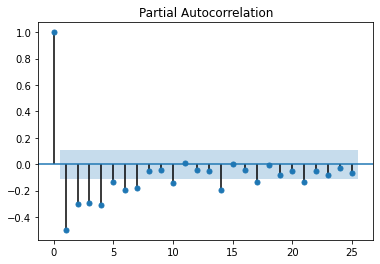

Plot Bobina # 1011384


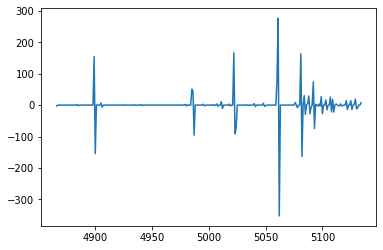

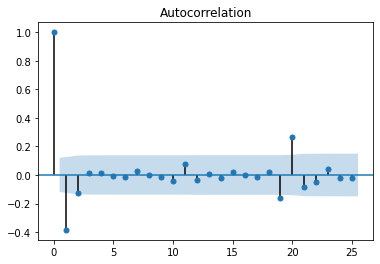

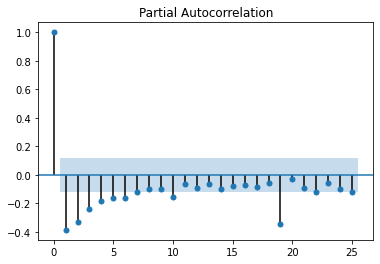

Plot Bobina # 1014989


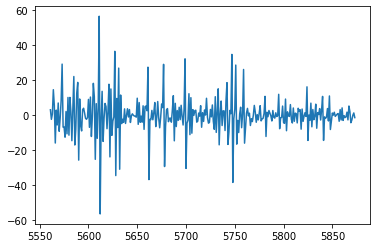

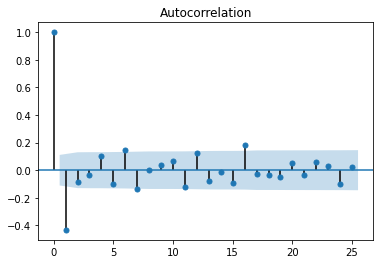

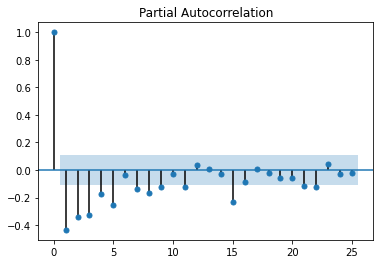

Plot Bobina # 1015101


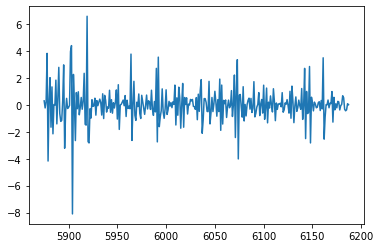

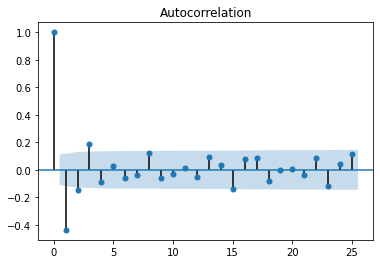

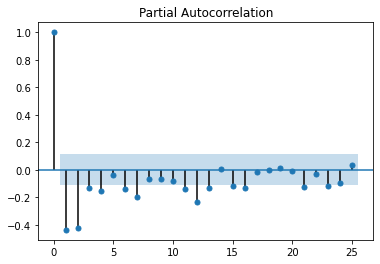

In [39]:
for i in range (len(series)):
    print(f'Plot Bobina # {bobinas2[i]}')
    y = series[i]

    z[i] = y.diff().dropna() # in case we need two differences
    plt.plot(z[i])
    plt.show()
    plot_acf(z[i],lags=num_lags)
    plt.show()
    plot_pacf(z[i],lags=num_lags)
    plt.show()

#### 4.6.2 Checking Stationarity for Transformed Data
Run ADF test:
- if p-value < 0.05, the process is stationary.
- if p-value > 0.05, the process is NOT stationary.

In [40]:
for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    adf_test = sm.tsa.stattools.adfuller(z[i],maxlag=10) 
    print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
    print()

    Stationary_firstTransformation[i] = adf_test[1]

Bobina # 1000116
adf_test (-9.590771147844611, 2.038949397982293e-16, 10, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, 2583.1912012826015)

Bobina # 1000117
adf_test (-9.898987748055664, 3.3974802859595333e-17, 9, 303, {'1%': -3.4521175397304784, '5%': -2.8711265007266666, '10%': -2.571877823851692}, 3205.7221619177526)

Bobina # 1000120
adf_test (-9.43904691579291, 4.951518702711728e-16, 9, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, 2131.749189117435)

Bobina # 1000123
adf_test (-9.853582586066665, 4.4194500332089746e-17, 9, 303, {'1%': -3.4521175397304784, '5%': -2.8711265007266666, '10%': -2.571877823851692}, 3812.848581171292)

Bobina # 1000124
adf_test (-8.963120491066343, 8.123048115898433e-15, 10, 302, {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2.5718948388228586}, 2361.1896943644088)

Bobina # 1002901
adf_test (-9.239991314887831, 1.5921109796722811e-15, 10, 300, {'1%': -3

#### 4.6.3 Checking Stationarity for Transformed Data

Box test for transformed data:
- If p-value < 0.05, there IS correlation (ACF & PACF are NOT 0)
- If p-value > 0.05, there is NO correlation (ACF & PACF = 0)

In [41]:
import statsmodels.api as sm
for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    box_test_1 = sm.stats.acorr_ljungbox(z[i], lags=[20])
    box_test_2 = sm.stats.acorr_ljungbox(z[i]**2, lags=[20])
    print("Box test z",box_test_1)
    print("Box test z**2",box_test_2)
    print()


    Correlation_firstTransformation[i] = box_test_1[1]
    Independent_firstTransformation[i] = box_test_2[1]

Bobina # 1000116
Box test z (array([139.51992516]), array([6.24159011e-20]))
Box test z**2 (array([122.07953671]), array([1.17331704e-16]))

Bobina # 1000117
Box test z (array([89.4918496]), array([9.09452086e-11]))
Box test z**2 (array([77.05458785]), array([1.23421167e-08]))

Bobina # 1000120
Box test z (array([86.65007239]), array([2.83858903e-10]))
Box test z**2 (array([60.26820654]), array([6.47207637e-06]))

Bobina # 1000123
Box test z (array([87.92275173]), array([1.7068548e-10]))
Box test z**2 (array([73.90613197]), array([4.14219788e-08]))

Bobina # 1000124
Box test z (array([87.50074663]), array([2.02084446e-10]))
Box test z**2 (array([85.72741205]), array([4.09976396e-10]))

Bobina # 1002901
Box test z (array([86.97015399]), array([2.49814713e-10]))
Box test z**2 (array([71.80110998]), array([9.22914555e-08]))

Bobina # 1002902
Box test z (array([128.49868281]), array([7.45133325e-18]))
Box test z**2 (array([154.50019287]), array([8.61036336e-23]))

Bobina # 1003430
Box test

#### 4.6.4 Checking Normality for Transformed Data


Histogram Bobina # 1000116


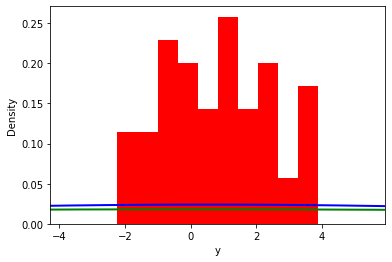

Histogram Bobina # 1000117


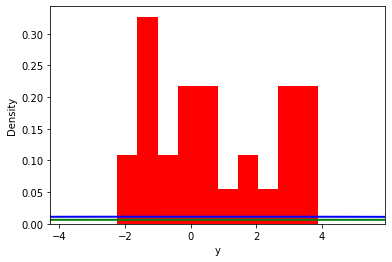

Histogram Bobina # 1000120


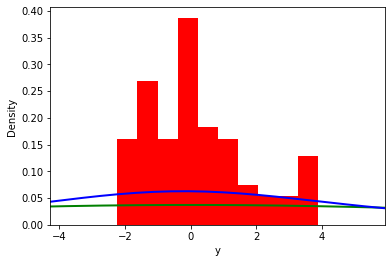

Histogram Bobina # 1000123


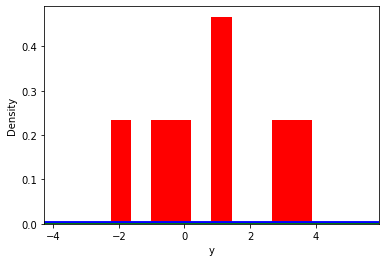

Histogram Bobina # 1000124


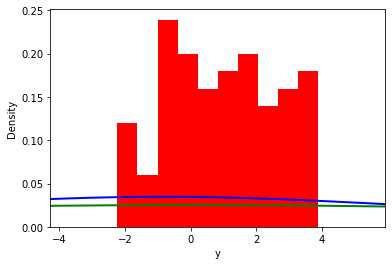

Histogram Bobina # 1002901


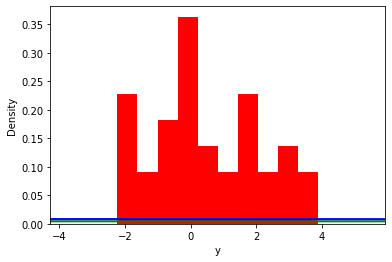

Histogram Bobina # 1002902


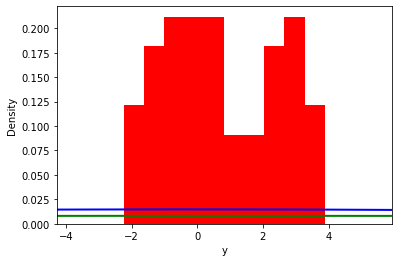

Histogram Bobina # 1003430


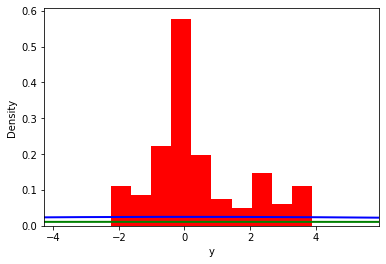

Histogram Bobina # 1004230


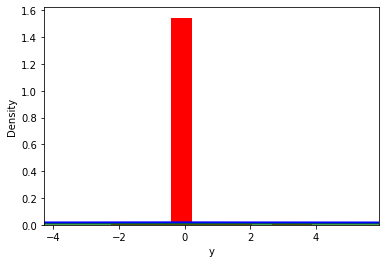

Histogram Bobina # 1004431


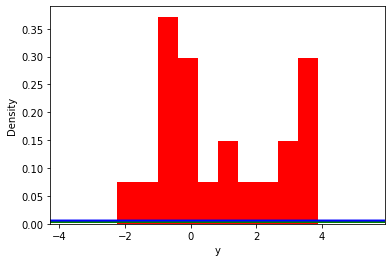

Histogram Bobina # 1004670


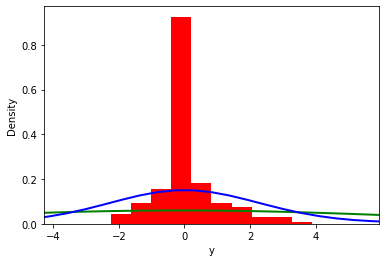

Histogram Bobina # 1006440


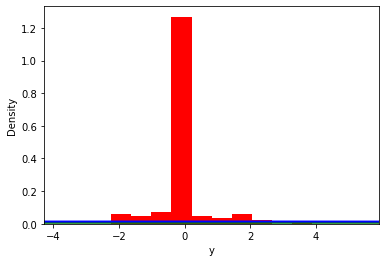

Histogram Bobina # 1007700


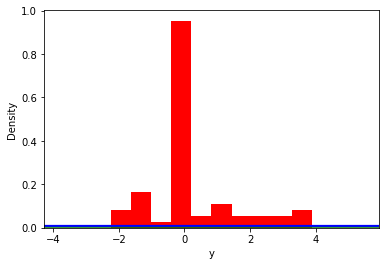

Histogram Bobina # 1011384


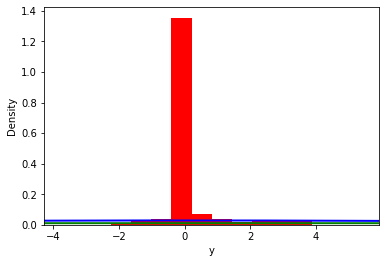

Histogram Bobina # 1014989


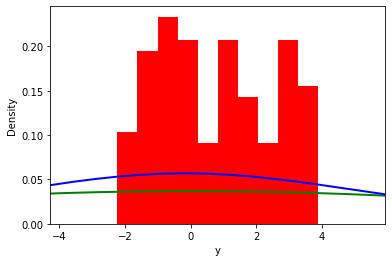

Histogram Bobina # 1015101


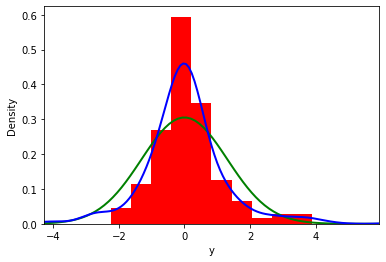

In [42]:
for i in range (len(series)):
    print(f'Histogram Bobina # {bobinas2[i]}')
    mu = np.mean(z[i])
    sigma = np.std(z[i])
    x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
    pdf = st.norm.pdf(x, mu, sigma)
    ax = plt.plot(x, pdf, lw = 2, color = "g")
    ax = plt.hist(z[i],density=True, range = (mean - 3*std, mean + 3*std), color = "r")
    ax = sns.distplot(z[i], hist = False, kde = True,
                     kde_kws = {'linewidth': 2}, color = "blue")
    ax.set_xlim(mean - 5*std, mean + 5*std)

    plt.show()

Shapiro Test for Normality
- If p-value < 0.05, the series is NOT normal
- If p-value > 0.05, the series is normal

In [43]:
from scipy.stats import shapiro
# Normality test
for i in range (len(series)):
    print(f'Bobina # {bobinas2[i]}')
    saphiro = shapiro(z[i])

    print("Shapiro",saphiro) # first output "The test statistic", second output "p-value"
    print()

    Normality_firstTransformation[i]= saphiro[1]

Bobina # 1000116
Shapiro (0.9350706338882446, 1.8321193173687078e-10)

Bobina # 1000117
Shapiro (0.6708648204803467, 3.1988777106798372e-24)

Bobina # 1000120
Shapiro (0.8813084959983826, 8.035108697650693e-15)

Bobina # 1000123
Shapiro (0.8220511078834534, 2.8328055323457982e-18)

Bobina # 1000124
Shapiro (0.9491211175918579, 6.200252311572285e-09)

Bobina # 1002901
Shapiro (0.7742835879325867, 2.1119473617714467e-20)

Bobina # 1002902
Shapiro (0.7235323190689087, 2.0763176221634915e-22)

Bobina # 1003430
Shapiro (0.6076134443283081, 4.762960029788928e-26)

Bobina # 1004230
Shapiro (0.6654546856880188, 4.641036338357572e-24)

Bobina # 1004431
Shapiro (0.6475361585617065, 6.124746636496013e-25)

Bobina # 1004670
Shapiro (0.518588662147522, 3.7953044744750544e-28)

Bobina # 1006440
Shapiro (0.7036005258560181, 5.2894452136833234e-23)

Bobina # 1007700
Shapiro (0.7619383335113525, 6.0666694360539155e-21)

Bobina # 1011384
Shapiro (0.3433774709701538, 5.752258848178232e-30)

Bobina # 1014

#### 4.6.5 Summary of Transformed Data

In [44]:
for i in range (len(series)):
    print()
    print(f'Statistics Series Bobina # {bobinas2[i]}')
    print()
    if (Stationary[i] > 0.05):

        if (Stationary_firstTransformation[i] <  0.05):
            print("Stationary, we don't need a second transformation")
        else:
            print("Not Stationary, we need a second transformation")

        if (Normality_firstTransformation[i] <  0.05):
            print("Not Normal")
        else:
            print("Normal")

        if (Correlation_firstTransformation[i] <  0.05):
            print("There is Correlation")
        else:
            print("There is no Correlation")
            if (Independent_firstTransformation[i] <  0.05):
                print("There is no Independence")
            else:
                print("There is Independence")
    else:
        print("Not needed")


Statistics Series Bobina # 1000116

Stationary, we don't need a second transformation
Not Normal
There is Correlation

Statistics Series Bobina # 1000117

Not needed

Statistics Series Bobina # 1000120

Not needed

Statistics Series Bobina # 1000123

Not needed

Statistics Series Bobina # 1000124

Not needed

Statistics Series Bobina # 1002901

Not needed

Statistics Series Bobina # 1002902

Not needed

Statistics Series Bobina # 1003430

Not needed

Statistics Series Bobina # 1004230

Not needed

Statistics Series Bobina # 1004431

Not needed

Statistics Series Bobina # 1004670

Not needed

Statistics Series Bobina # 1006440

Not needed

Statistics Series Bobina # 1007700

Not needed

Statistics Series Bobina # 1011384

Not needed

Statistics Series Bobina # 1014989

Stationary, we don't need a second transformation
Not Normal
There is Correlation

Statistics Series Bobina # 1015101

Not needed
